In [184]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_columns=None
pd.set_option('display.float_format', '{:.7f}'.format)

np.set_printoptions(suppress=True, precision=7)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler ,StandardScaler

from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import silhouette_score, pairwise_distances, make_scorer

from sklearn.model_selection import ParameterGrid , KFold , GridSearchCV, RandomizedSearchCV



from sklearn.decomposition import PCA

from sklearn.ensemble import IsolationForest

from sklearn.manifold import TSNE

from sklearn.neighbors import LocalOutlierFactor

In [185]:
# loading the csv file
auto_insurance_df = pd.read_csv('Dataset/AutoInsurance.csv')
# display top 5 records
auto_insurance_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.5192790,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.8111470,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.5359030,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.4649350,Four-Door Car,Medsize
2,AI49188,Nevada,12887.4316500,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.4722470,Two-Door Car,Medsize
3,WW63253,California,7645.8618270,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.8813440,SUV,Medsize
4,HB64268,Washington,2813.6925750,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.1308790,Four-Door Car,Medsize


In [186]:
auto_insurance_df.shape

(9134, 24)

In [187]:
auto_insurance_df_copy = auto_insurance_df.copy()

In [188]:
auto_insurance_df_copy = auto_insurance_df.copy()
auto_insurance_df_copy.drop('Customer', axis=1, inplace=True)
# dropping Customer column as it is not important for our analysis

In [189]:
# Need the Customer Lifetime Value column name -> CLV

auto_insurance_df_copy.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

# Data Preparation

#### For Numerical column

In [190]:
auto_insurance_df_copy_num = auto_insurance_df_copy.select_dtypes(exclude='O')
auto_insurance_df_copy_num.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.5192790,56274,69,32,5,0,1,384.8111470
1,6979.5359030,0,94,13,42,0,8,1131.4649350
2,12887.4316500,48767,108,18,38,0,2,566.4722470
3,7645.8618270,0,106,18,65,0,7,529.8813440
4,2813.6925750,43836,73,12,44,0,1,138.1308790


In [191]:
auto_insurance_df_copy_num.skew()

CLV                             3.0322803
Income                          0.2868873
Monthly Premium Auto            2.1235464
Months Since Last Claim         0.2785863
Months Since Policy Inception   0.0401650
Number of Open Complaints       2.7832631
Number of Policies              1.2533327
Total Claim Amount              1.7149658
dtype: float64

In [192]:
# Need to change the format of Effective To Date
auto_insurance_df_copy['Effective To Date'] = pd.to_datetime(auto_insurance_df_copy['Effective To Date'])
auto_insurance_df_copy['Effective Month'] = auto_insurance_df_copy['Effective To Date'].apply(lambda x:x.month)
auto_insurance_df_copy['Effective Day'] = auto_insurance_df_copy['Effective To Date'].apply(lambda x:x.day_name())
auto_insurance_df_copy.drop('Effective To Date', axis=1, inplace=True)
auto_insurance_df_copy.head()

,State,CLV,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective Month,Effective Day
0,Washington,2763.5192790,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.8111470,Two-Door Car,Medsize,2,Thursday
1,Arizona,6979.5359030,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.4649350,Four-Door Car,Medsize,1,Monday
2,Nevada,12887.4316500,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.4722470,Two-Door Car,Medsize,2,Saturday
3,California,7645.8618270,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.8813440,SUV,Medsize,1,Thursday
4,Washington,2813.6925750,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.1308790,Four-Door Car,Medsize,3,Wednesday


#### For Categorical column

In [193]:
auto_insurance_df_copy_cat = auto_insurance_df_copy.select_dtypes(include='O')
auto_insurance_df_copy_cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective Day
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Thursday
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Monday
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Saturday
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Thursday
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Wednesday


In [194]:
le_state = LabelEncoder()
# label with alphbetical order.
# Arizona -> 0 , California -> 1, Nevada -> 2, Nevada -> 3, Washington -> 4
auto_insurance_df_copy_cat['State'] = le_state.fit_transform(auto_insurance_df_copy_cat['State'])

auto_insurance_df_copy_cat['Response'] = auto_insurance_df_copy_cat['Response'].map({'No':0, 'Yes':1})


or_coverage = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']])
# change the encoding by order basic -> 0, Extended -> 1 and Premium -> 2
auto_insurance_df_copy_cat['Coverage'] = or_coverage.fit_transform(auto_insurance_df_copy_cat['Coverage'].values.reshape(-1,1)) 


or_edu = OrdinalEncoder(categories=[['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']])
# change the encoding by order High School or Below -> 0, College -> 1, Bachelor -> 2, Master -> 3 and Doctor -> 4
auto_insurance_df_copy_cat['Education'] = or_edu.fit_transform(auto_insurance_df_copy_cat['Education'].values.reshape(-1,1)) 

le_emp_stat = LabelEncoder()
# label with alphbetical order.
# Disabled -> 0 , Employed -> 1, Medical Leave -> 2, Retired -> 3, Unemployed -> 4
auto_insurance_df_copy_cat['EmploymentStatus'] = le_emp_stat.fit_transform(auto_insurance_df_copy_cat['EmploymentStatus'])



auto_insurance_df_copy_cat['Gender'] = auto_insurance_df_copy_cat['Gender'].map({'F':0, 'M':1})



le_loc_code = LabelEncoder()
# label with alphbetical order.
# Suburban -> 0 , Rural -> 1 and Urban -> 2
auto_insurance_df_copy_cat['Location Code'] = le_loc_code.fit_transform(auto_insurance_df_copy_cat['Location Code'])

or_Marital_Stat = OrdinalEncoder(categories=[['Married', 'Single', 'Divorced']])
# change the encoding by order Single -> 0, Married -> 1 and Divorced -> 2
auto_insurance_df_copy_cat['Marital Status'] = or_Marital_Stat.fit_transform(auto_insurance_df_copy_cat['Marital Status'].values.reshape(-1,1)) 

le_pol_type = LabelEncoder()
# label with alphbetical order.
# Corporate Auto -> 0 , Personal Auto -> 1 and Special Auto -> 2
auto_insurance_df_copy_cat['Policy'] = le_pol_type.fit_transform(auto_insurance_df_copy_cat['Policy'])


le_pol = LabelEncoder()
# label with alphbetical order.
# Corporate Auto -> 0 , Personal Auto -> 1 and Special Auto -> 2
auto_insurance_df_copy_cat['Policy Type'] = le_pol.fit_transform(auto_insurance_df_copy_cat['Policy Type'])



le_ren_off_type = LabelEncoder()
# label with alphbetical order.
# Offer1 -> 0 , Offer2 -> 1, Offer3 -> 2 and Offer4 -> 3
auto_insurance_df_copy_cat['Renew Offer Type'] = le_ren_off_type.fit_transform(auto_insurance_df_copy_cat['Renew Offer Type'])


le_sales_channel = LabelEncoder()
# label with alphbetical order.
# Agent -> 0 , Branch -> 1, Call Center -> 2 and Agent -> 3
auto_insurance_df_copy_cat['Sales Channel'] = le_sales_channel.fit_transform(auto_insurance_df_copy_cat['Sales Channel'])



or_vec_class = OrdinalEncoder(categories=[['Two-Door Car', 'Four-Door Car', 'SUV', 'Sports Car', 'Luxury Car', 'Luxury SUV']])
# 'Two-Door Car' -> 0 , 'Four-Door Car'-> 1 , 'SUV' -> 2 , 'Sports Car' -> 3, 'Luxury Car' -> 4, 'Luxury SUV' -> 5
auto_insurance_df_copy_cat['Vehicle Class'] = or_vec_class.fit_transform(auto_insurance_df_copy_cat['Vehicle Class'].values.reshape(-1,1)) 


or_vec_size = OrdinalEncoder(categories=[['Small', 'Medsize', 'Large']])
# Small -> 0 , 'Medsize'-> 1 ,and 'Large' -> 2 
auto_insurance_df_copy_cat['Vehicle Size'] = or_vec_size.fit_transform(auto_insurance_df_copy_cat['Vehicle Size'].values.reshape(-1,1)) 


or_day_name = OrdinalEncoder(categories=[['Sunday','Monday','Tuesday','Wednesday','Thursday',
       'Friday', 'Saturday']])

auto_insurance_df_copy_cat['Effective Day'] = or_day_name.fit_transform(auto_insurance_df_copy_cat['Effective Day'].values.reshape(-1,1)) 


auto_insurance_df_copy_cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective Day
0,4,0,0.0000000,2.0000000,1,0,1,0.0000000,0,2,0,0,0.0000000,1.0000000,4.0000000
1,0,0,1.0000000,2.0000000,4,0,1,1.0000000,1,5,2,0,1.0000000,1.0000000,1.0000000
2,2,0,2.0000000,2.0000000,1,0,1,0.0000000,1,5,0,0,0.0000000,1.0000000,6.0000000
3,1,0,0.0000000,2.0000000,4,1,1,0.0000000,0,1,0,2,2.0000000,1.0000000,4.0000000
4,4,0,0.0000000,2.0000000,1,1,0,1.0000000,1,3,0,0,1.0000000,1.0000000,3.0000000


In [195]:
auto_insurance_df_copy = pd.concat([auto_insurance_df_copy_num, auto_insurance_df_copy_cat], axis=1)
auto_insurance_df_copy.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective Day
0,2763.5192790,56274,69,32,5,0,1,384.8111470,4,0,0.0000000,2.0000000,1,0,1,0.0000000,0,2,0,0,0.0000000,1.0000000,4.0000000
1,6979.5359030,0,94,13,42,0,8,1131.4649350,0,0,1.0000000,2.0000000,4,0,1,1.0000000,1,5,2,0,1.0000000,1.0000000,1.0000000
2,12887.4316500,48767,108,18,38,0,2,566.4722470,2,0,2.0000000,2.0000000,1,0,1,0.0000000,1,5,0,0,0.0000000,1.0000000,6.0000000
3,7645.8618270,0,106,18,65,0,7,529.8813440,1,0,0.0000000,2.0000000,4,1,1,0.0000000,0,1,0,2,2.0000000,1.0000000,4.0000000
4,2813.6925750,43836,73,12,44,0,1,138.1308790,4,0,0.0000000,2.0000000,1,1,0,1.0000000,1,3,0,0,1.0000000,1.0000000,3.0000000


In [196]:
X = auto_insurance_df_copy.drop('CLV', axis=1)
X.shape

(9134, 22)

In [197]:
numerical_cols = ['Income','Monthly Premium Auto','Total Claim Amount','Months Since Last Claim','Months Since Policy Inception']
X_num = X[numerical_cols]

# Outliers detection

In [198]:
z_scores = (X_num - X_num.mean()) / X_num.std()

# Define a threshold for detecting outliers
threshold = 3  # Common threshold for outliers (Z-score > 3 or Z-score < -3)

# Get rows where any Z-score is greater than the threshold
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Display the rows that are outliers
outlier_rows = X_num[outliers]
outlier_rows.shape

(287, 5)

In [199]:
Q1 = X_num.quantile(0.25)
Q3 = X_num.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get rows where any value is outside the bounds
outliers = ((X_num < lower_bound) | (X_num> upper_bound)).any(axis=1)

# Display the rows that are outliers
outlier_rows = X_num[outliers]
print("Total number of outlier records ", outlier_rows.shape[0])
print("Total percentage of outlier records ", outlier_rows.shape[0]/X_num.shape[0])

Total number of outlier records  642
Total percentage of outlier records  0.07028684037661484


## Outliers detection using Analomy Detection

In [200]:
def silhouette_scorer(estimator, X):
    y_pred = estimator.fit_predict(X)
    return silhouette_score(X, y_pred)

In [201]:
# Apply VarianceThreshold on numerical columns only
#selector = VarianceThreshold(threshold=0.1)
#data_selected = selector.fit_transform(X_num)

# Scale only the selected numerical data
scaler = RobustScaler()
#data_scaled = scaler.fit_transform(data_selected)
data_scaled = scaler.fit_transform(X_num)


# Apply Isolation Forest on the combined data
isolation_forest = IsolationForest(contamination='auto',random_state=42)
isolation_forest.fit(data_scaled)

# Predict anomalies (-1 for anomaly, 1 for normal)
anomalies = isolation_forest.predict(data_scaled)

auto_insurance_df_copy['anomaly'] = anomalies

# Evaluate: Silhouette Score
silhouette_avg = silhouette_score(data_scaled, anomalies)
silhouette_avg

0.19972867627903737

In [202]:
# we are getting 0.065 without doing hyperparametertuning. Let try to improve the performance

In [203]:
8100/9314

0.8696585784840026

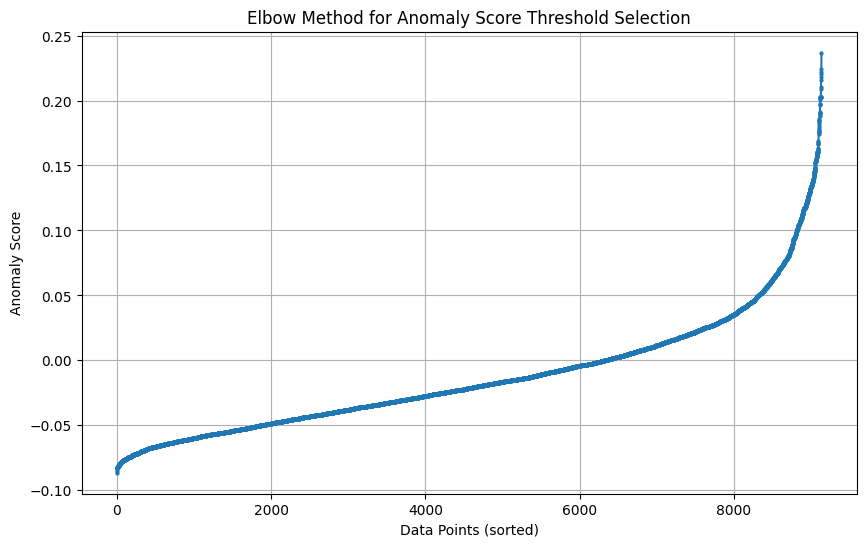

In [204]:
anomaly_scores = -isolation_forest.decision_function(data_scaled)  # Invert to make anomalies have higher scores

sorted_scores = np.sort(anomaly_scores)

plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_scores)), sorted_scores, marker='o', markersize=2, linestyle='-')
plt.xlabel("Data Points (sorted)")
plt.ylabel("Anomaly Score")
plt.title("Elbow Method for Anomaly Score Threshold Selection")
plt.grid()
plt.show()

In [205]:
threshold = np.percentile(sorted_scores, 93)

# Identify data points that exceed the threshold
estimated_anomalies = anomaly_scores > threshold
estimated_anomaly_ratio = np.mean(estimated_anomalies)
print(f"Estimated Anomaly Ratio: {estimated_anomaly_ratio:.4f}")

Estimated Anomaly Ratio: 0.0701


anomaly
 1    6328
-1    2806
Name: count, dtype: int64


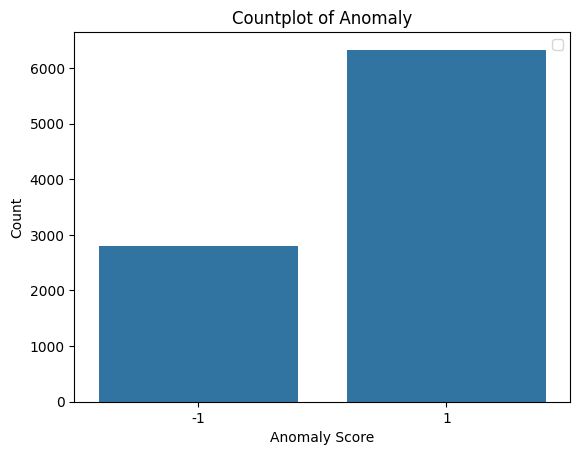

In [206]:
print(auto_insurance_df_copy['anomaly'].value_counts())
sns.countplot(data=auto_insurance_df_copy, x='anomaly')
plt.xlabel("Anomaly Score")
plt.ylabel("Count")
plt.legend()
plt.title("Countplot of Anomaly")
plt.show()

In [207]:
# We can see 8220 records as now records which represent as 1.
# while 914 records are of analomy detection which about 10% which represent -1.

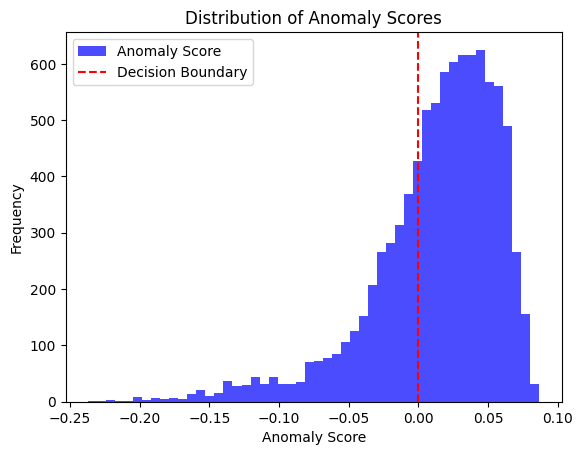

In [208]:
scores = isolation_forest.decision_function(data_scaled)
threshold = 0 
plt.hist(scores, bins=50, alpha=0.7, color='blue', label='Anomaly Score')
plt.axvline(x=threshold, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Anomaly Scores")
plt.show()

In [209]:
# Majority of the records are having positive score.

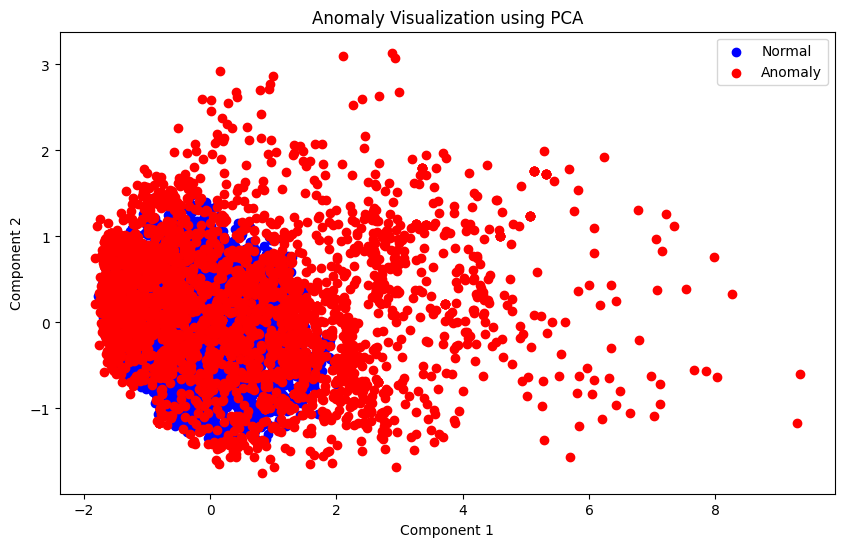

In [210]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled) 

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

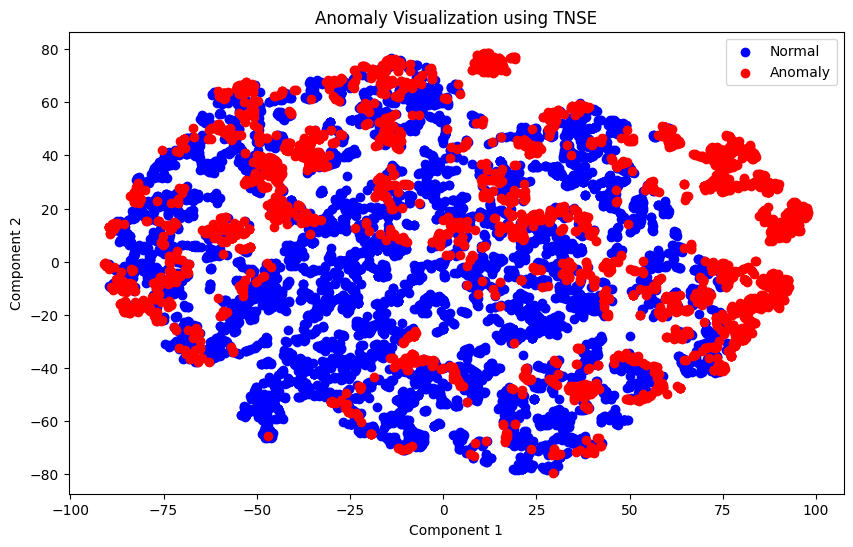

In [211]:
tnse = TSNE(n_components=2)
data_2d = tnse.fit_transform(data_scaled) 

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using TNSE')
plt.legend()
plt.show()

# Hyperparameters tuning 

In [212]:
%%time
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.75, 1.0],
    'contamination': [0.05, 0.1, 0.15],
    'max_features': [1, 2, 3, 4, 5],
    'bootstrap': [False, True]
}

# Generate all parameter combinations
param_combinations = list(ParameterGrid(param_grid))

best_params = None
best_silhouette = -1  # Start with a low value for silhouette score

for params in param_combinations:
    # Initialize Isolation Forest with current parameters
    model = IsolationForest(
        n_estimators=params['n_estimators'],
        max_samples=params['max_samples'],
        contamination=params['contamination'],
        max_features=params['max_features'],
        bootstrap=params['bootstrap'],
        random_state=42
    )
    
    # Fit the model
    model.fit(data_scaled)
    anomalies = model.predict(data_scaled)
    
    # Evaluate: Silhouette Score
    silhouette_avg = silhouette_score(data_scaled, anomalies)
    
    # Calculate average distance to center
    normal_points = data_scaled[anomalies == 1]
    anomaly_points = data_scaled[anomalies == -1]
    center = normal_points.mean(axis=0)
    avg_distance = np.mean(pairwise_distances(anomaly_points, [center]))
    
    print(f"Params: {params}, Silhouette Score: {silhouette_avg}, Avg Distance: {avg_distance}")
    
    # Update best parameters if silhouette score is higher
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_silhouette)

Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 50}, Silhouette Score: 0.5212722389336076, Avg Distance: 3.967877171572134
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 100}, Silhouette Score: 0.5058471628310072, Avg Distance: 3.859056309855686
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 150}, Silhouette Score: 0.5035026443442535, Avg Distance: 3.844179210100508
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 50}, Silhouette Score: 0.519990163909029, Avg Distance: 3.9624635412722085
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 100}, Silhouette Score: 0.5104549105689641, Avg Distance: 3.8962152342911747
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples'

Params: {'bootstrap': False, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 50}, Silhouette Score: 0.4182046893657075, Avg Distance: 3.147222759087
Params: {'bootstrap': False, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 100}, Silhouette Score: 0.40314273354308644, Avg Distance: 3.081234950238649
Params: {'bootstrap': False, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 150}, Silhouette Score: 0.40936110227634503, Avg Distance: 3.1140742249596696
Params: {'bootstrap': False, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 50}, Silhouette Score: 0.4085252103833629, Avg Distance: 3.099402220435663
Params: {'bootstrap': False, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 100}, Silhouette Score: 0.40967866274555764, Avg Distance: 3.111759317818201
Params: {'bootstrap': False, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.75

Params: {'bootstrap': False, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 50}, Silhouette Score: 0.32965144161561394, Avg Distance: 2.6878893583400436
Params: {'bootstrap': False, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 100}, Silhouette Score: 0.32680177175927283, Avg Distance: 2.689490646872559
Params: {'bootstrap': False, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 150}, Silhouette Score: 0.3332466249528526, Avg Distance: 2.7169268098707806
Params: {'bootstrap': False, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 50}, Silhouette Score: 0.323798815488713, Avg Distance: 2.6652530905157903
Params: {'bootstrap': False, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 100}, Silhouette Score: 0.3290773916241126, Avg Distance: 2.6958075001575947
Params: {'bootstrap': False, 'contamination': 0.15, 'max_features': 1, 'max_samp

Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 50}, Silhouette Score: 0.5261993309445367, Avg Distance: 4.015202232483362
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 100}, Silhouette Score: 0.5185846381535647, Avg Distance: 3.961111460831941
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 150}, Silhouette Score: 0.5133443975947554, Avg Distance: 3.9195921196311776
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 50}, Silhouette Score: 0.5333683826596929, Avg Distance: 4.064422387585502
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 100}, Silhouette Score: 0.52018052861202, Avg Distance: 3.970353126429193
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.75, 

Params: {'bootstrap': True, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 50}, Silhouette Score: 0.4192924133995111, Avg Distance: 3.1584179871620237
Params: {'bootstrap': True, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 100}, Silhouette Score: 0.40953308000886424, Avg Distance: 3.11599538621606
Params: {'bootstrap': True, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 150}, Silhouette Score: 0.4148284625243186, Avg Distance: 3.143429045076218
Params: {'bootstrap': True, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 50}, Silhouette Score: 0.4194134397806427, Avg Distance: 3.154442923803523
Params: {'bootstrap': True, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 100}, Silhouette Score: 0.41411368168012025, Avg Distance: 3.136632132367368
Params: {'bootstrap': True, 'contamination': 0.1, 'max_features': 1, 'max_samples': 0.75, 'n_

Params: {'bootstrap': True, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 100}, Silhouette Score: 0.3293267693663484, Avg Distance: 2.69972601688769
Params: {'bootstrap': True, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 150}, Silhouette Score: 0.3328993187861348, Avg Distance: 2.7158749475744934
Params: {'bootstrap': True, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 50}, Silhouette Score: 0.33078038707016333, Avg Distance: 2.6975394657992733
Params: {'bootstrap': True, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 100}, Silhouette Score: 0.3324745524679239, Avg Distance: 2.7103738464003904
Params: {'bootstrap': True, 'contamination': 0.15, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 150}, Silhouette Score: 0.33912342272457324, Avg Distance: 2.739598545635167
Params: {'bootstrap': True, 'contamination': 0.15, 'max_features': 1, 'max_samples':

In [213]:
# We improve the silhoutte score 0.522 let try to improve further.

In [214]:
isolation_forest_tuned =  IsolationForest(bootstrap=True, contamination=0.05, max_features=1, max_samples=0.75,
                                         n_estimators=50)
isolation_forest_tuned.fit(data_scaled)
anomalies = isolation_forest_tuned.predict(data_scaled)

silhouette_score(data_scaled,anomalies)

0.46331688869636817

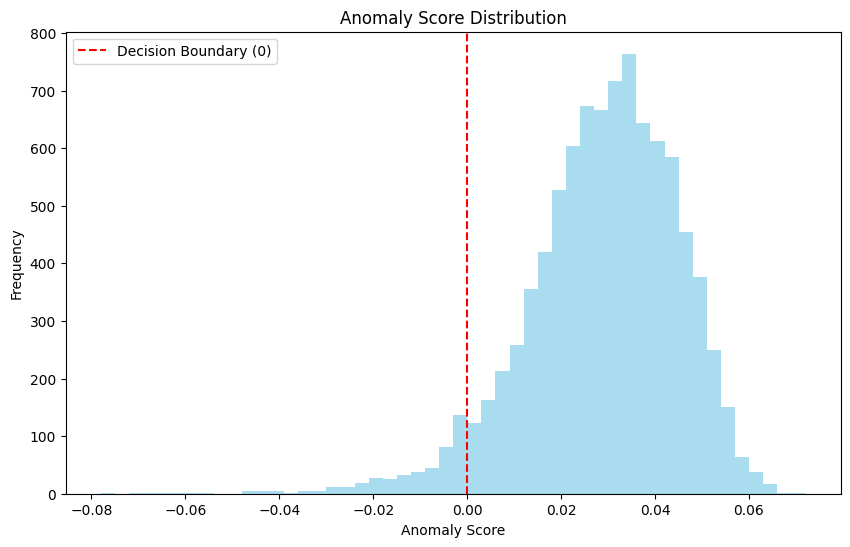

In [215]:
scores = isolation_forest_tuned.decision_function(data_scaled)
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.legend()
plt.show()

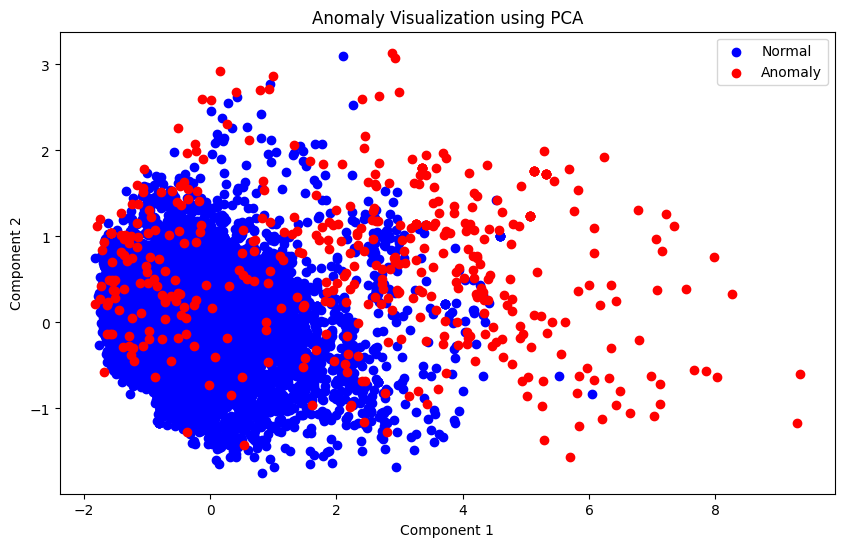

In [216]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest_tuned.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

In [217]:
%%time
param_grid2 = {
    'n_estimators': [25, 50, 75],
    'max_samples': [0.2,0.3,0.4,0.5,0.6],
    'contamination': [0.01, 0.025, 0.05],
    'max_features': [1, 2, 3],
    'bootstrap': [False, True]
}

# Generate all parameter combinations
param_combinations2 = list(ParameterGrid(param_grid2))

best_params = None
best_silhouette = -1  # Start with a low value for silhouette score

for params in param_combinations2:
    # Initialize Isolation Forest with current parameters
    model = IsolationForest(
        n_estimators=params['n_estimators'],
        max_samples=params['max_samples'],
        contamination=params['contamination'],
        max_features=params['max_features'],
        bootstrap=params['bootstrap'],
        random_state=42
    )
    
    # Fit the model
    model.fit(data_scaled)
    anomalies = model.predict(data_scaled)
    
    # Evaluate: Silhouette Score
    silhouette_avg = silhouette_score(data_scaled, anomalies)
    
    # Calculate average distance to center
    normal_points = data_scaled[anomalies == 1]
    anomaly_points = data_scaled[anomalies == -1]
    center = normal_points.mean(axis=0)
    avg_distance = np.mean(pairwise_distances(anomaly_points, [center]))
    
    print(f"Params: {params}, Silhouette Score: {silhouette_avg}, Avg Distance: {avg_distance}")
    
    # Update best parameters if silhouette score is higher
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_silhouette)

Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 25}, Silhouette Score: 0.6361365019309824, Avg Distance: 5.76268287919404
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 50}, Silhouette Score: 0.6495249212499093, Avg Distance: 5.993385359558949
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 75}, Silhouette Score: 0.6442567670880028, Avg Distance: 5.896058776271335
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 25}, Silhouette Score: 0.6307754002940245, Avg Distance: 5.670448566443771
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 50}, Silhouette Score: 0.6470975902979064, Avg Distance: 5.9483923213932295
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.3,

Params: {'bootstrap': False, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 50}, Silhouette Score: 0.580469607450809, Avg Distance: 4.767705311533327
Params: {'bootstrap': False, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 75}, Silhouette Score: 0.5818586843199568, Avg Distance: 4.786706222253743
Params: {'bootstrap': False, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 25}, Silhouette Score: 0.577822874907721, Avg Distance: 4.733464758235299
Params: {'bootstrap': False, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 50}, Silhouette Score: 0.589473393225386, Avg Distance: 4.871748207314576
Params: {'bootstrap': False, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 75}, Silhouette Score: 0.586968257048872, Avg Distance: 4.84048423994051
Params: {'bootstrap': False, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.4

Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 50}, Silhouette Score: 0.5250422103107147, Avg Distance: 4.002886449682366
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 75}, Silhouette Score: 0.5148167972269875, Avg Distance: 3.9293035483275385
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 25}, Silhouette Score: 0.523438361750957, Avg Distance: 3.9872088064471147
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 50}, Silhouette Score: 0.5335751430815985, Avg Distance: 4.070067458827471
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 75}, Silhouette Score: 0.5216582658297225, Avg Distance: 3.984981588180213
Params: {'bootstrap': False, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.4

Params: {'bootstrap': True, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 50}, Silhouette Score: 0.6419456172470529, Avg Distance: 5.861749711483754
Params: {'bootstrap': True, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 75}, Silhouette Score: 0.6428605084540167, Avg Distance: 5.877309684168789
Params: {'bootstrap': True, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 25}, Silhouette Score: 0.6199046121300736, Avg Distance: 5.502135690307217
Params: {'bootstrap': True, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 50}, Silhouette Score: 0.6397764138469315, Avg Distance: 5.83205127816811
Params: {'bootstrap': True, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 75}, Silhouette Score: 0.6431893923593703, Avg Distance: 5.88111070142431
Params: {'bootstrap': True, 'contamination': 0.01, 'max_features': 1, 'max_samples': 0.4, 'n_esti

Params: {'bootstrap': True, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.2, 'n_estimators': 75}, Silhouette Score: 0.5812389082576465, Avg Distance: 4.778676355727407
Params: {'bootstrap': True, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 25}, Silhouette Score: 0.5695851746875042, Avg Distance: 4.6412186501139745
Params: {'bootstrap': True, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 50}, Silhouette Score: 0.588864979714674, Avg Distance: 4.8628490515533995
Params: {'bootstrap': True, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 75}, Silhouette Score: 0.588020215772795, Avg Distance: 4.853453578544576
Params: {'bootstrap': True, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.4, 'n_estimators': 25}, Silhouette Score: 0.5501205430378694, Avg Distance: 4.431307904043907
Params: {'bootstrap': True, 'contamination': 0.025, 'max_features': 1, 'max_samples': 0.4,

Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 25}, Silhouette Score: 0.5056810092843881, Avg Distance: 3.855210270181201
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 50}, Silhouette Score: 0.5257551247797797, Avg Distance: 4.0145309439859105
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.3, 'n_estimators': 75}, Silhouette Score: 0.5192408025619948, Avg Distance: 3.9670609202810776
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.4, 'n_estimators': 25}, Silhouette Score: 0.4854053927689792, Avg Distance: 3.6974967696471386
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.4, 'n_estimators': 50}, Silhouette Score: 0.514461844654174, Avg Distance: 3.922608454189558
Params: {'bootstrap': True, 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.4, 'n_

In [218]:
# We improve the silhoutte score from 0.522 to 0.65. let try to improve further.

In [219]:
isolation_forest_tuned =  IsolationForest(bootstrap=False, contamination=0.01, max_features=2, max_samples=0.2,
                                         n_estimators=75 ,random_state=100)
isolation_forest_tuned.fit(data_scaled)
anomalies = isolation_forest_tuned.predict(data_scaled)

silhouette_score(data_scaled,anomalies)

0.6365173572915019

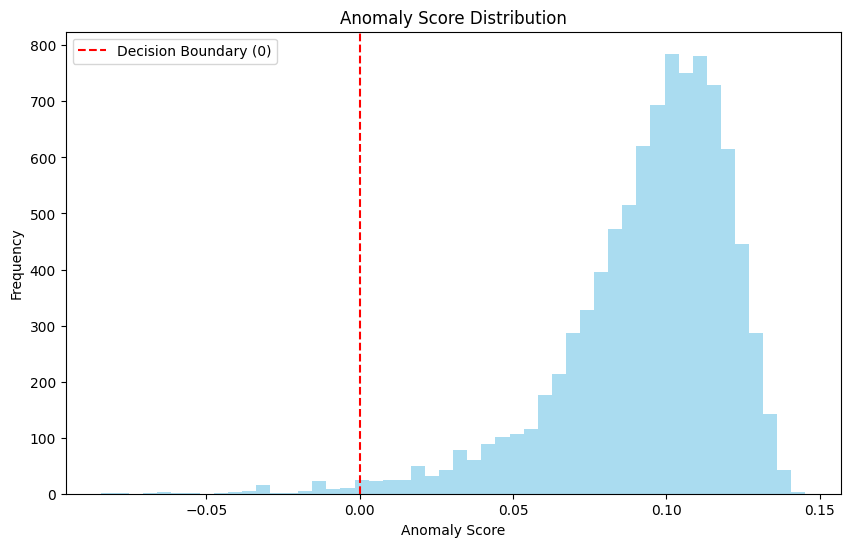

In [220]:
scores = isolation_forest_tuned.decision_function(data_scaled)
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.legend()
plt.show()

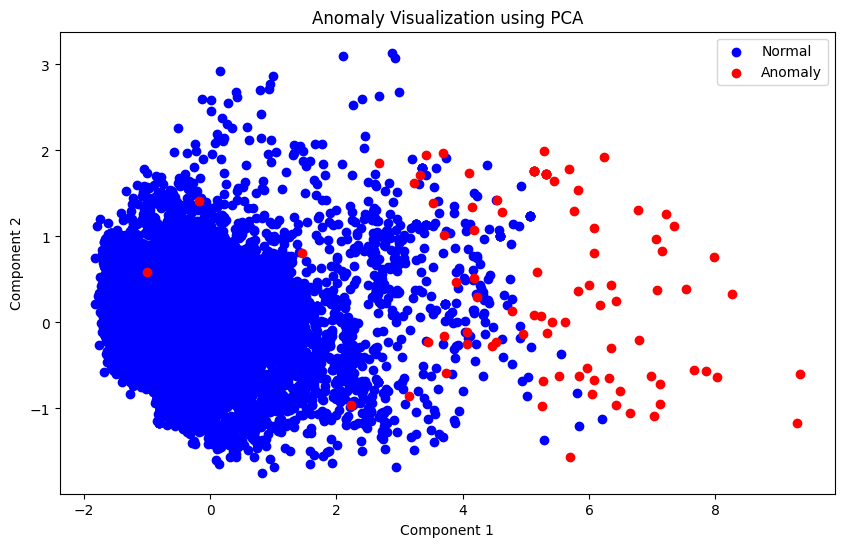

In [221]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest_tuned.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

In [222]:
%%time
param_grid3 = {
    'n_estimators': [30, 40, 50],
    'max_samples': [0.4,0.45,0.5],
    'contamination': [0.0025, 0.005, 0.0075, 0.01],
    'max_features': [3, 4, 5],
    'bootstrap': [False, True]
}

# Generate all parameter combinations
param_combinations3 = list(ParameterGrid(param_grid3))

best_params = None
best_silhouette = -1  # Start with a low value for silhouette score

for params in param_combinations3:
    # Initialize Isolation Forest with current parameters
    model = IsolationForest(
        n_estimators=params['n_estimators'],
        max_samples=params['max_samples'],
        contamination=params['contamination'],
        max_features=params['max_features'],
        bootstrap=params['bootstrap'],
        random_state=42
    )
    
    # Fit the model
    model.fit(data_scaled)
    anomalies = model.predict(data_scaled)
    
    # Evaluate: Silhouette Score
    silhouette_avg = silhouette_score(data_scaled, anomalies)
    
    # Calculate average distance to center
    normal_points = data_scaled[anomalies == 1]
    anomaly_points = data_scaled[anomalies == -1]
    center = normal_points.mean(axis=0)
    avg_distance = np.mean(pairwise_distances(anomaly_points, [center]))
    
    print(f"Params: {params}, Silhouette Score: {silhouette_avg}, Avg Distance: {avg_distance}")
    
    # Update best parameters if silhouette score is higher
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_silhouette)

Params: {'bootstrap': False, 'contamination': 0.0025, 'max_features': 3, 'max_samples': 0.4, 'n_estimators': 30}, Silhouette Score: 0.7072961725681927, Avg Distance: 7.431458498273738
Params: {'bootstrap': False, 'contamination': 0.0025, 'max_features': 3, 'max_samples': 0.4, 'n_estimators': 40}, Silhouette Score: 0.7050806926660487, Avg Distance: 7.378257831602977
Params: {'bootstrap': False, 'contamination': 0.0025, 'max_features': 3, 'max_samples': 0.4, 'n_estimators': 50}, Silhouette Score: 0.7070634674095825, Avg Distance: 7.428221932667864
Params: {'bootstrap': False, 'contamination': 0.0025, 'max_features': 3, 'max_samples': 0.45, 'n_estimators': 30}, Silhouette Score: 0.7091559730602153, Avg Distance: 7.479567429199257
Params: {'bootstrap': False, 'contamination': 0.0025, 'max_features': 3, 'max_samples': 0.45, 'n_estimators': 40}, Silhouette Score: 0.7070526687726408, Avg Distance: 7.428706068113753
Params: {'bootstrap': False, 'contamination': 0.0025, 'max_features': 3, 'max_

Params: {'bootstrap': False, 'contamination': 0.005, 'max_features': 5, 'max_samples': 0.4, 'n_estimators': 30}, Silhouette Score: 0.6761780479167608, Avg Distance: 6.626841346151315
Params: {'bootstrap': False, 'contamination': 0.005, 'max_features': 5, 'max_samples': 0.4, 'n_estimators': 40}, Silhouette Score: 0.6772546020880544, Avg Distance: 6.649084288851981
Params: {'bootstrap': False, 'contamination': 0.005, 'max_features': 5, 'max_samples': 0.4, 'n_estimators': 50}, Silhouette Score: 0.6829883071007979, Avg Distance: 6.7689396820886305
Params: {'bootstrap': False, 'contamination': 0.005, 'max_features': 5, 'max_samples': 0.45, 'n_estimators': 30}, Silhouette Score: 0.6587563171302973, Avg Distance: 6.270336341726136
Params: {'bootstrap': False, 'contamination': 0.005, 'max_features': 5, 'max_samples': 0.45, 'n_estimators': 40}, Silhouette Score: 0.6639627656447777, Avg Distance: 6.3686728285001735
Params: {'bootstrap': False, 'contamination': 0.005, 'max_features': 5, 'max_samp

Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 4, 'max_samples': 0.4, 'n_estimators': 30}, Silhouette Score: 0.6349605939970657, Avg Distance: 5.710246616231484
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 4, 'max_samples': 0.4, 'n_estimators': 40}, Silhouette Score: 0.6331155475527871, Avg Distance: 5.672256854729835
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 4, 'max_samples': 0.4, 'n_estimators': 50}, Silhouette Score: 0.6356447590559914, Avg Distance: 5.717435497514004
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 4, 'max_samples': 0.45, 'n_estimators': 30}, Silhouette Score: 0.634184056079272, Avg Distance: 5.706886098099014
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 4, 'max_samples': 0.45, 'n_estimators': 40}, Silhouette Score: 0.6396058881080113, Avg Distance: 5.789023406244154
Params: {'bootstrap': False, 'contamination': 0.01, 'max_features': 4, 'max_samples': 0.4

Params: {'bootstrap': True, 'contamination': 0.005, 'max_features': 3, 'max_samples': 0.4, 'n_estimators': 30}, Silhouette Score: 0.6850103908911674, Avg Distance: 6.81729304145186
Params: {'bootstrap': True, 'contamination': 0.005, 'max_features': 3, 'max_samples': 0.4, 'n_estimators': 40}, Silhouette Score: 0.6826208701274253, Avg Distance: 6.762262525189081
Params: {'bootstrap': True, 'contamination': 0.005, 'max_features': 3, 'max_samples': 0.4, 'n_estimators': 50}, Silhouette Score: 0.6826630037484627, Avg Distance: 6.763254664468104
Params: {'bootstrap': True, 'contamination': 0.005, 'max_features': 3, 'max_samples': 0.45, 'n_estimators': 30}, Silhouette Score: 0.6810040870195143, Avg Distance: 6.731707431591087
Params: {'bootstrap': True, 'contamination': 0.005, 'max_features': 3, 'max_samples': 0.45, 'n_estimators': 40}, Silhouette Score: 0.6802680437872448, Avg Distance: 6.716375680781465
Params: {'bootstrap': True, 'contamination': 0.005, 'max_features': 3, 'max_samples': 0.4

Params: {'bootstrap': True, 'contamination': 0.0075, 'max_features': 5, 'max_samples': 0.4, 'n_estimators': 30}, Silhouette Score: 0.652198261307602, Avg Distance: 6.07369793052246
Params: {'bootstrap': True, 'contamination': 0.0075, 'max_features': 5, 'max_samples': 0.4, 'n_estimators': 40}, Silhouette Score: 0.6531010731180484, Avg Distance: 6.08320960142102
Params: {'bootstrap': True, 'contamination': 0.0075, 'max_features': 5, 'max_samples': 0.4, 'n_estimators': 50}, Silhouette Score: 0.6607675733796537, Avg Distance: 6.239922417050973
Params: {'bootstrap': True, 'contamination': 0.0075, 'max_features': 5, 'max_samples': 0.45, 'n_estimators': 30}, Silhouette Score: 0.6580655487856497, Avg Distance: 6.1947168884031525
Params: {'bootstrap': True, 'contamination': 0.0075, 'max_features': 5, 'max_samples': 0.45, 'n_estimators': 40}, Silhouette Score: 0.6537018221275678, Avg Distance: 6.09977522128529
Params: {'bootstrap': True, 'contamination': 0.0075, 'max_features': 5, 'max_samples':

In [223]:
# we able to improve the Silhouette Score to 0.49 from  0.42

In [224]:
# we able to improve the Silhouette Score to 0.58 from  0.5

In [225]:
isolation_forest_tuned =  IsolationForest(bootstrap=False, contamination=0.0025, max_features=3, max_samples=0.5,
                                         n_estimators=30 ,random_state=100 , warm_start=True)
isolation_forest_tuned.fit(data_scaled)
anomalies = isolation_forest_tuned.predict(data_scaled)

silhouette_score(data_scaled,anomalies)

0.7019566708468057

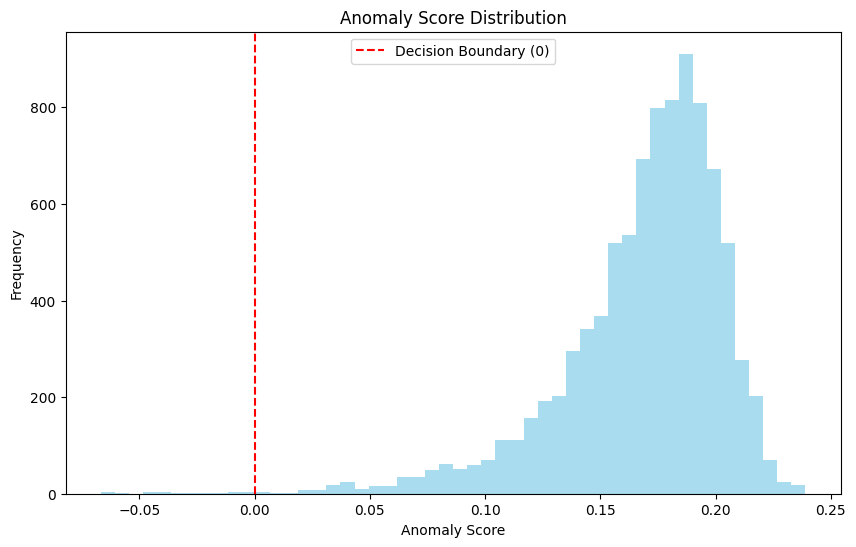

In [226]:
scores = isolation_forest_tuned.decision_function(data_scaled)
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.legend()
plt.show()

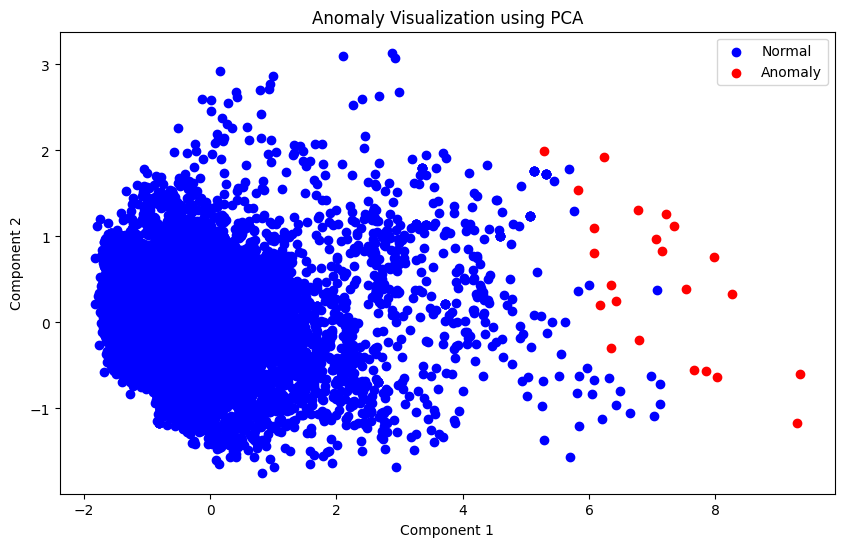

In [227]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest_tuned.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

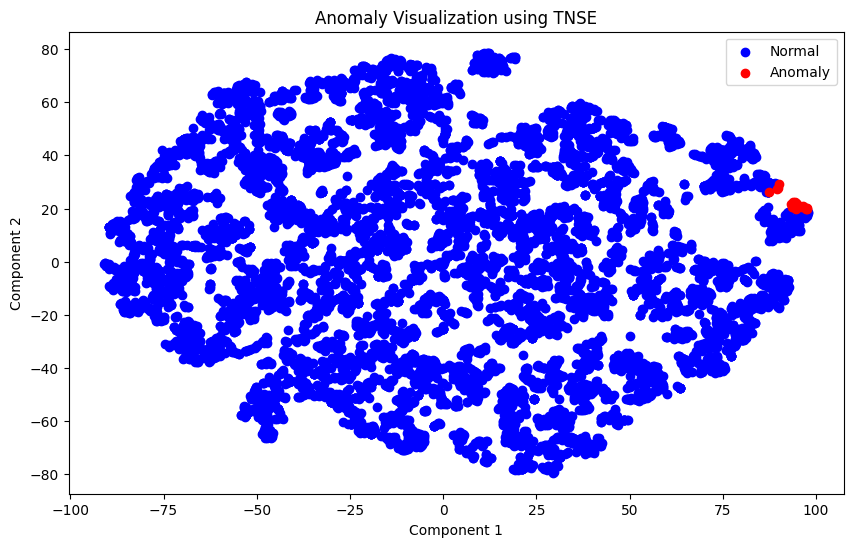

In [228]:
tnse = TSNE(n_components=2)
data_2d = tnse.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest_tuned.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using TNSE')
plt.legend()
plt.show()

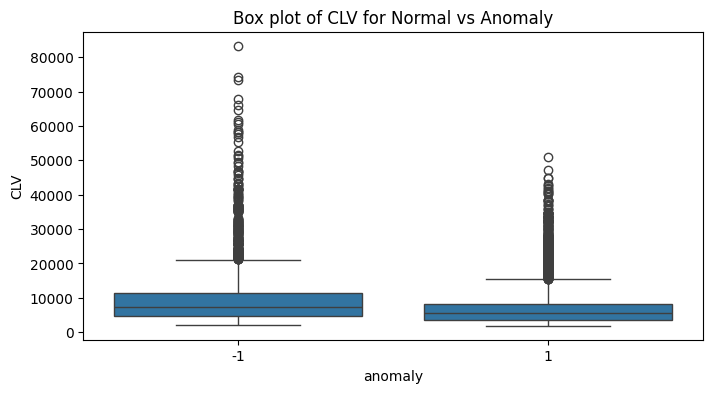

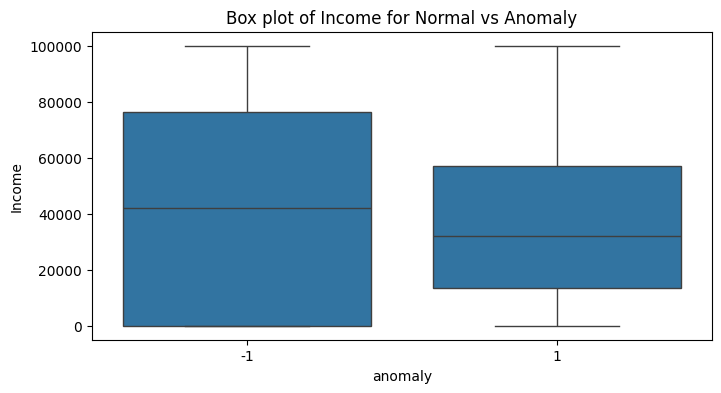

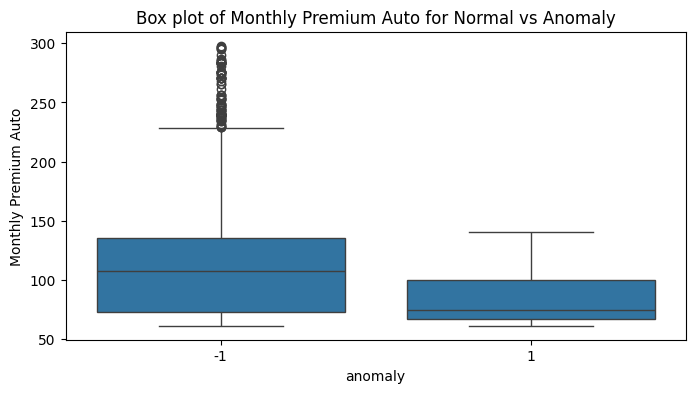

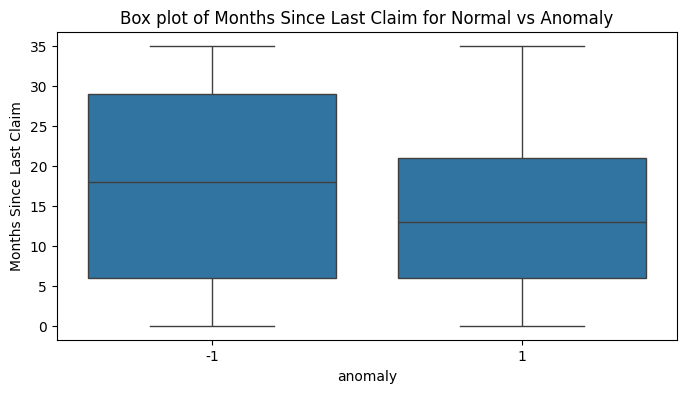

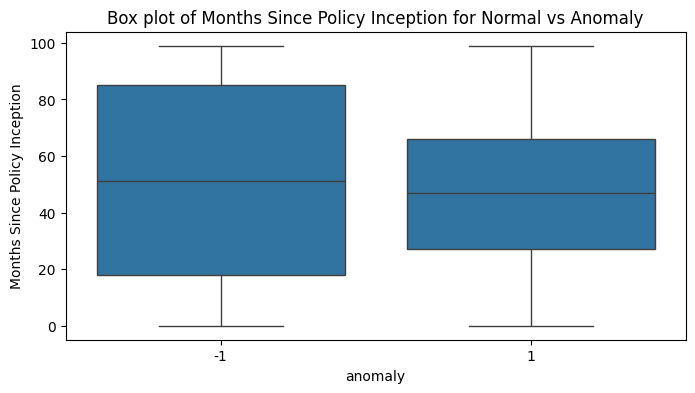

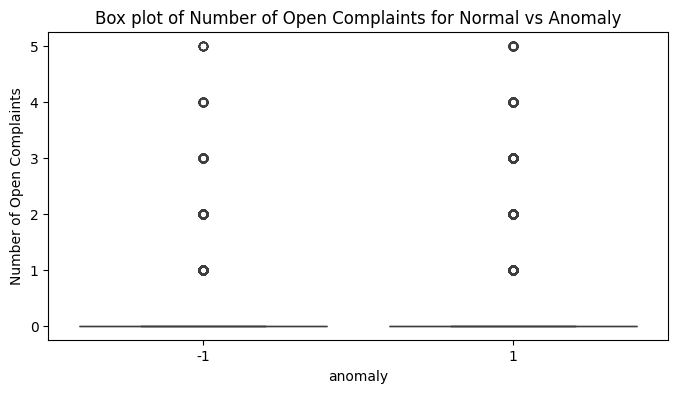

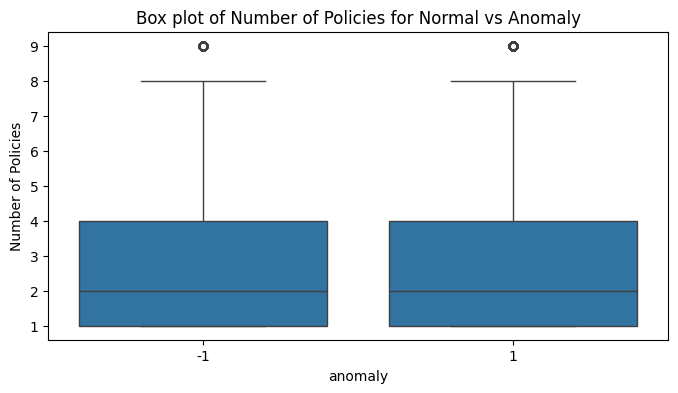

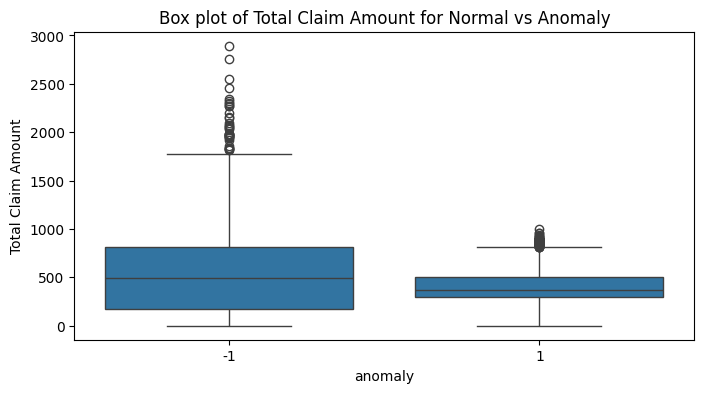

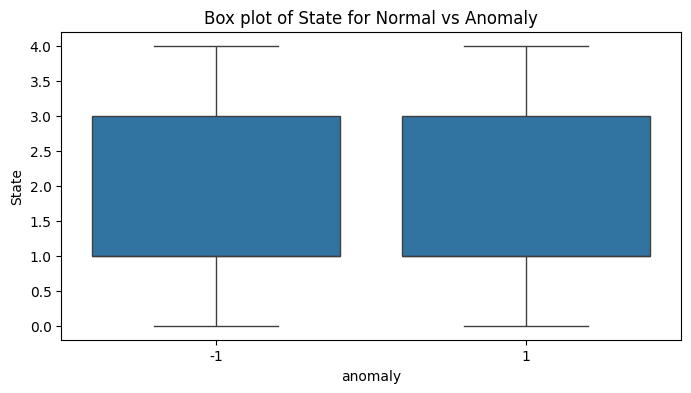

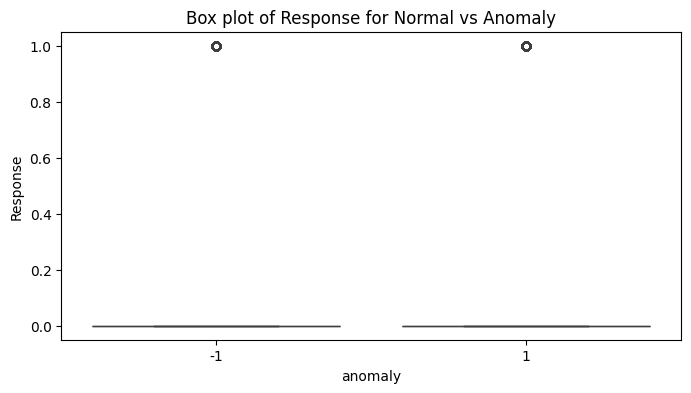

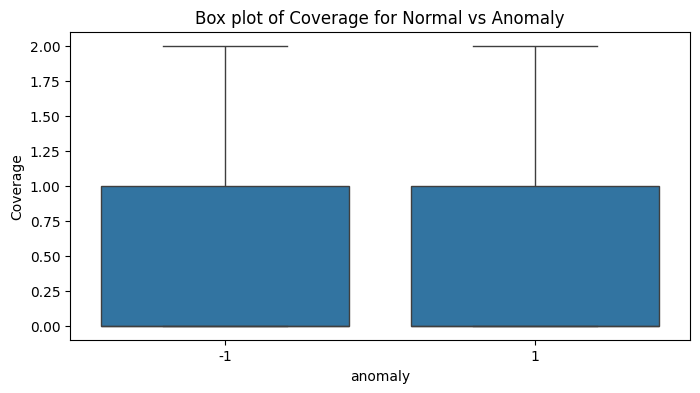

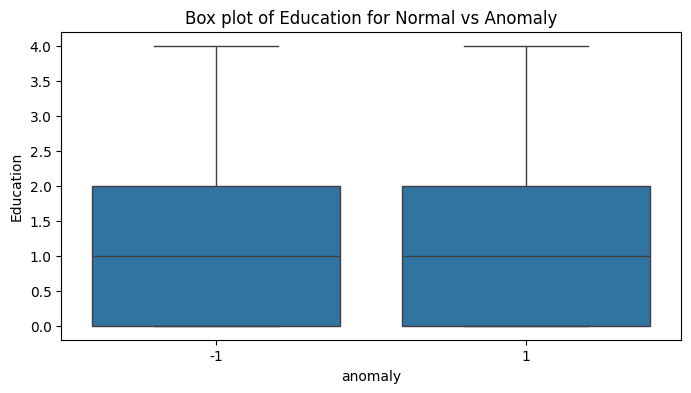

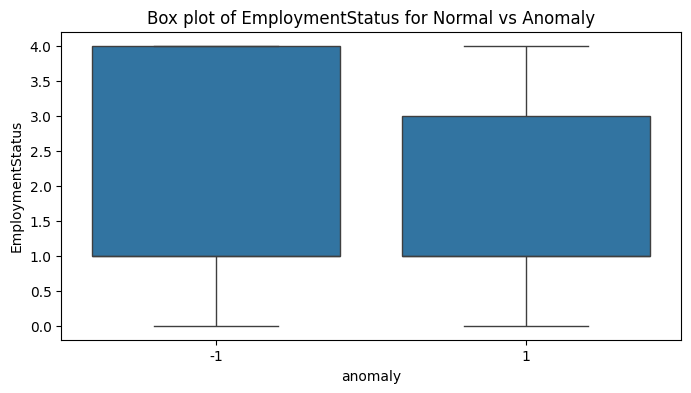

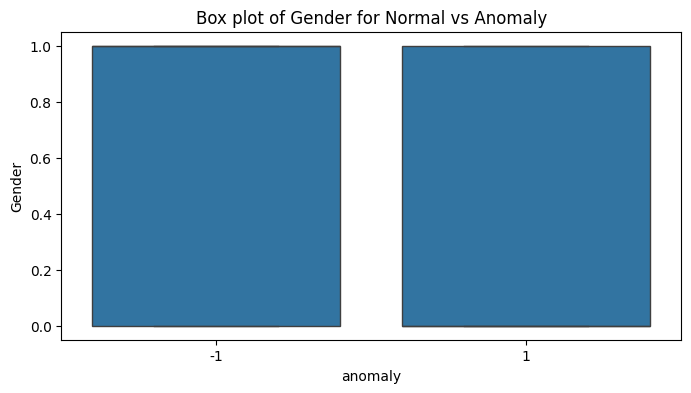

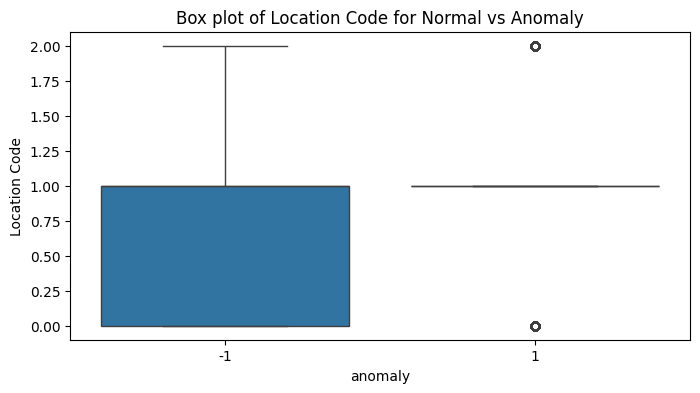

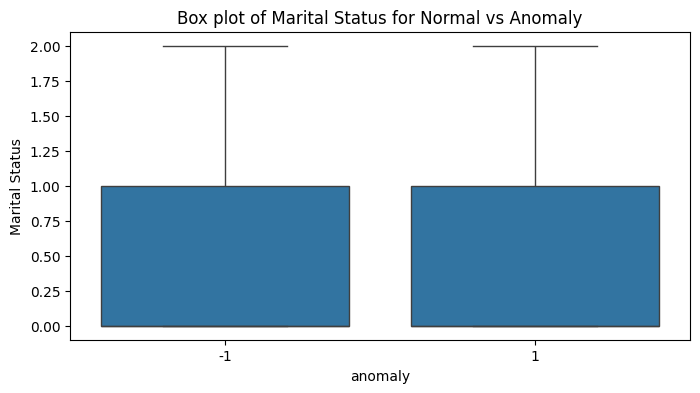

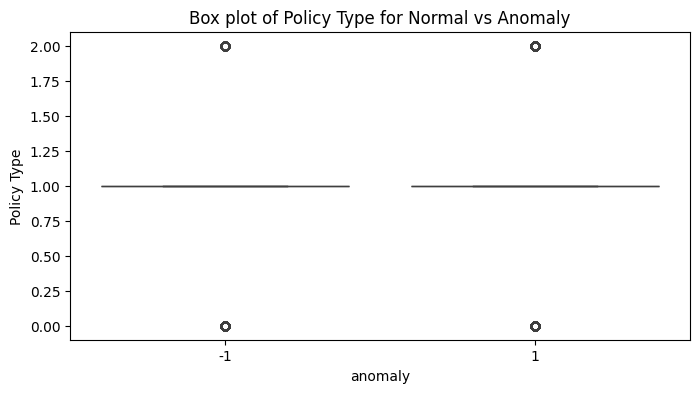

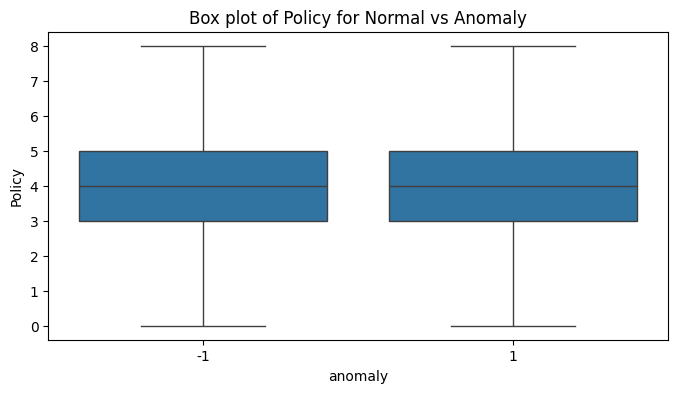

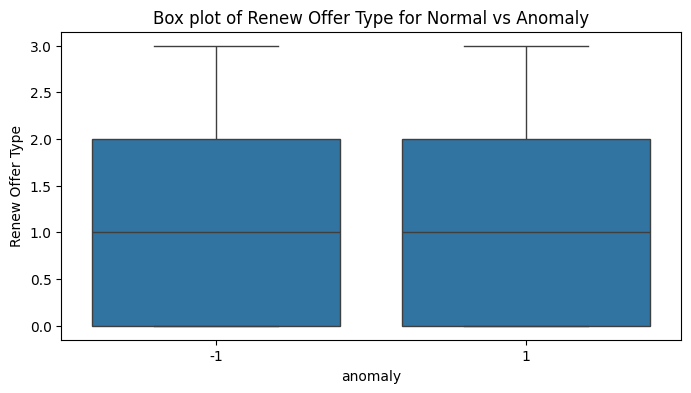

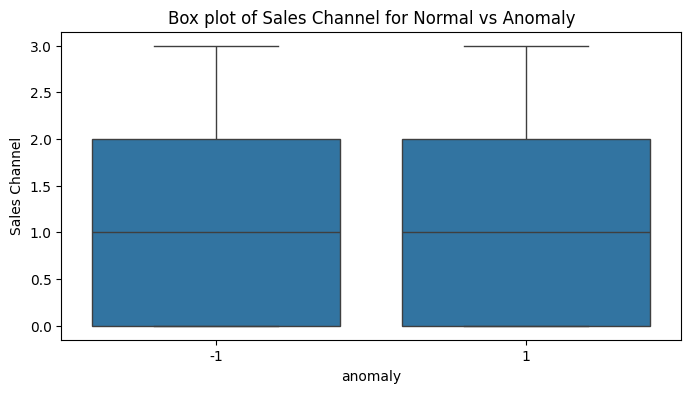

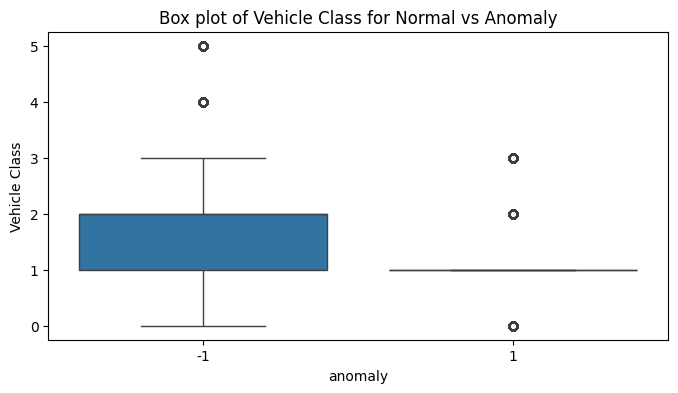

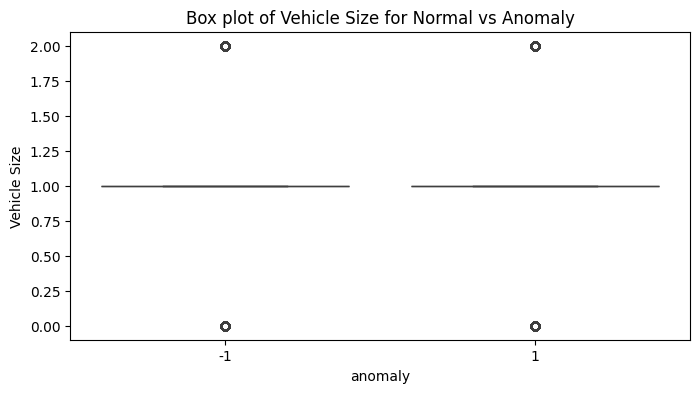

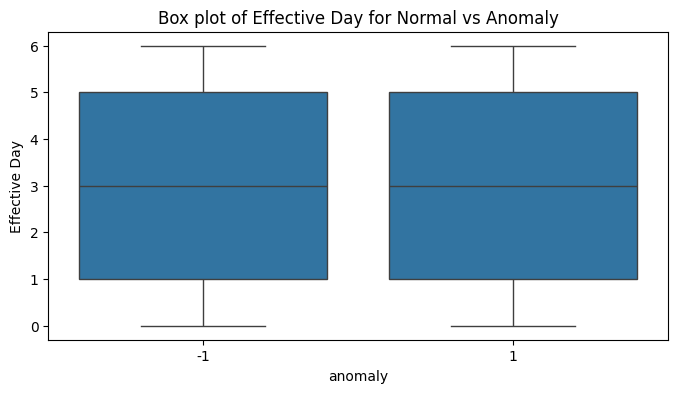

In [229]:
for column in auto_insurance_df_copy.columns[:-1]:  # Exclude the 'anomaly' column
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='anomaly', y=column, data=auto_insurance_df_copy)
    plt.title(f'Box plot of {column} for Normal vs Anomaly')
    plt.show()

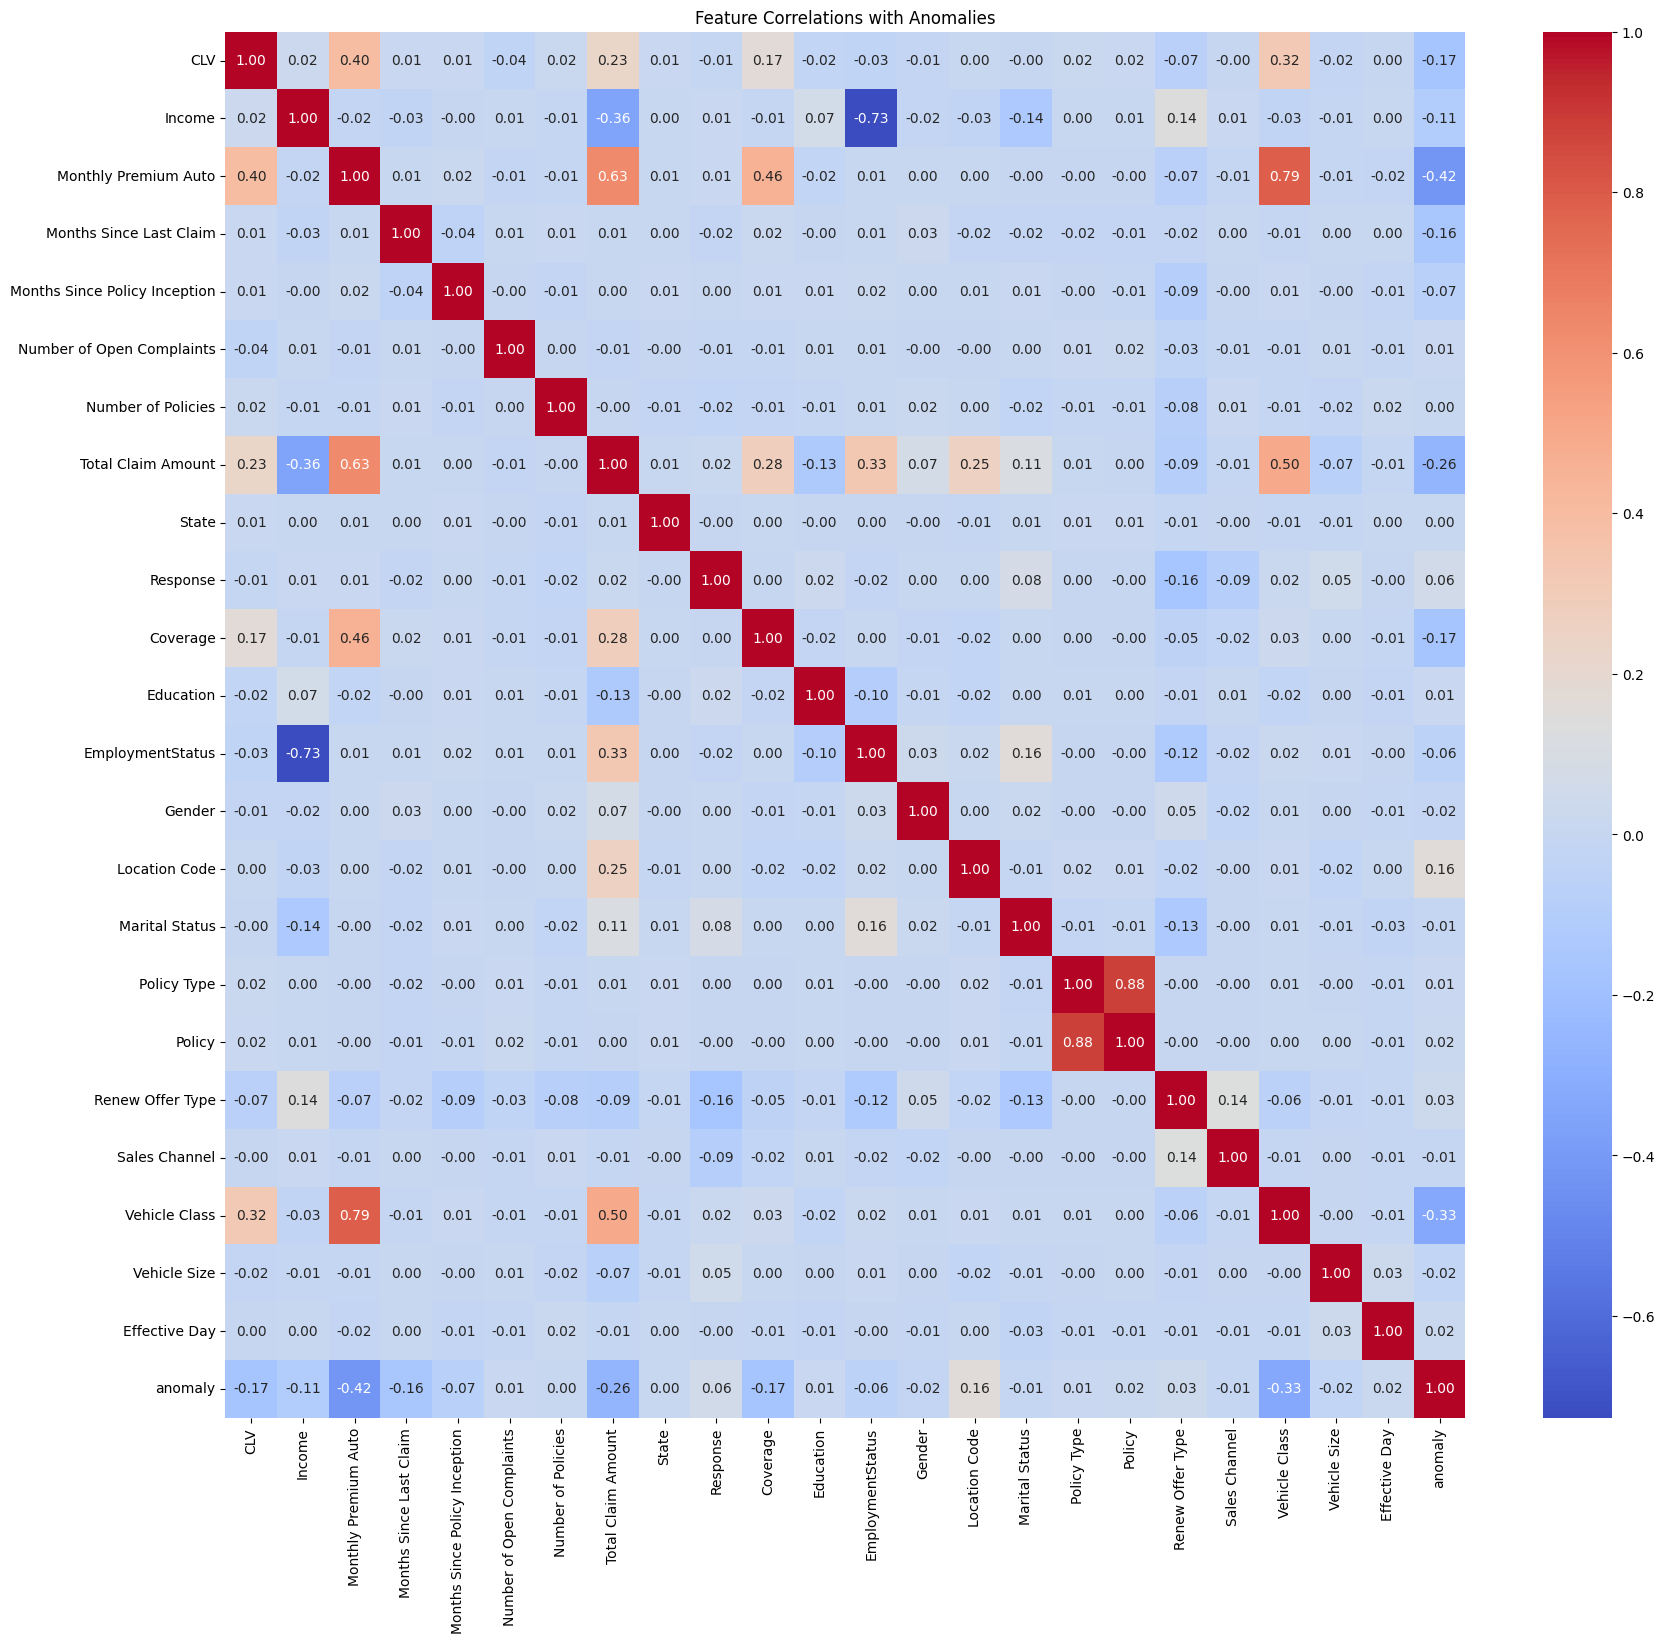

In [230]:
corr_matrix = auto_insurance_df_copy.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations with Anomalies')
plt.show()

In [231]:
isolation_forest_tuned =  IsolationForest(bootstrap=False, contamination=0.01, max_features=0.4, max_samples=0.2,
                                         n_estimators=75 ,random_state=100 , warm_start=True)
isolation_forest_tuned.fit(data_scaled)
anomalies = isolation_forest_tuned.predict(data_scaled)

silhouette_score(data_scaled,anomalies)

0.6365173572915019

In [232]:
auto_insurance_df_copy['anomaly'] = anomalies

In [233]:
auto_insurance_df_copy['anomaly'] = anomalies

auto_insurance_df_copy.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective Day,anomaly
0,2763.5192790,56274,69,32,5,0,1,384.8111470,4,0,0.0000000,2.0000000,1,0,1,0.0000000,0,2,0,0,0.0000000,1.0000000,4.0000000,1
1,6979.5359030,0,94,13,42,0,8,1131.4649350,0,0,1.0000000,2.0000000,4,0,1,1.0000000,1,5,2,0,1.0000000,1.0000000,1.0000000,1
2,12887.4316500,48767,108,18,38,0,2,566.4722470,2,0,2.0000000,2.0000000,1,0,1,0.0000000,1,5,0,0,0.0000000,1.0000000,6.0000000,1
3,7645.8618270,0,106,18,65,0,7,529.8813440,1,0,0.0000000,2.0000000,4,1,1,0.0000000,0,1,0,2,2.0000000,1.0000000,4.0000000,1
4,2813.6925750,43836,73,12,44,0,1,138.1308790,4,0,0.0000000,2.0000000,1,1,0,1.0000000,1,3,0,0,1.0000000,1.0000000,3.0000000,1


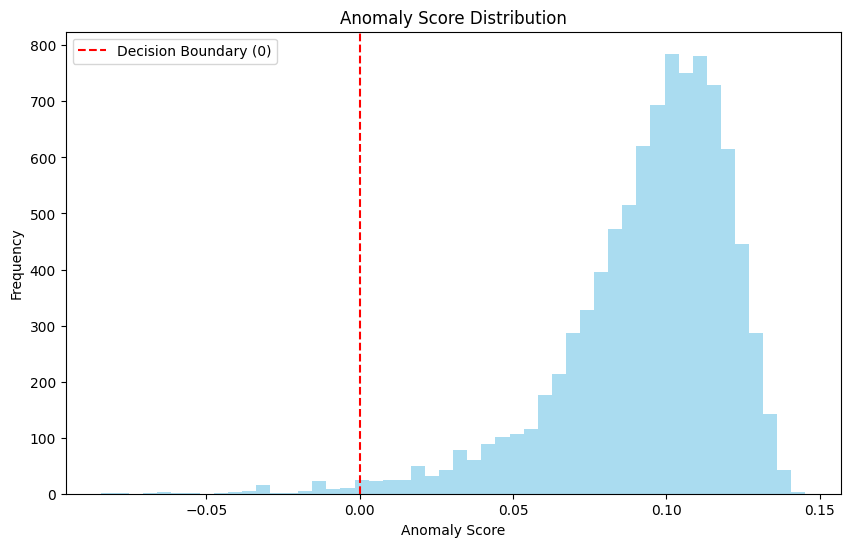

In [234]:
scores = isolation_forest_tuned.decision_function(data_scaled)
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.legend()
plt.show()

In [235]:
# above the values of prediction of anamoly 

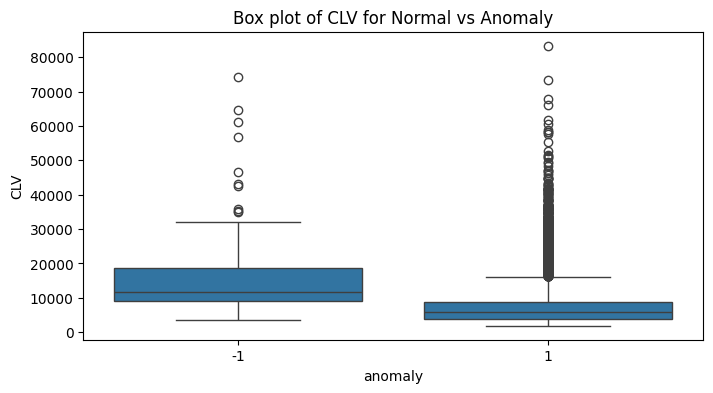

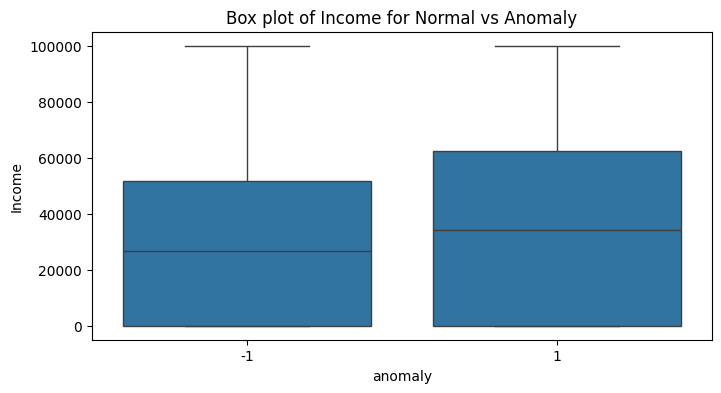

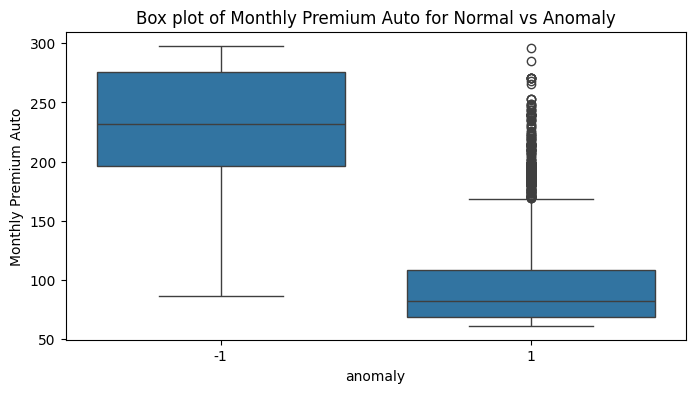

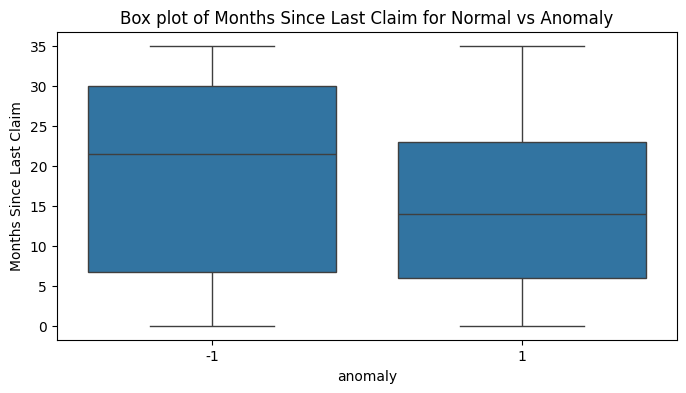

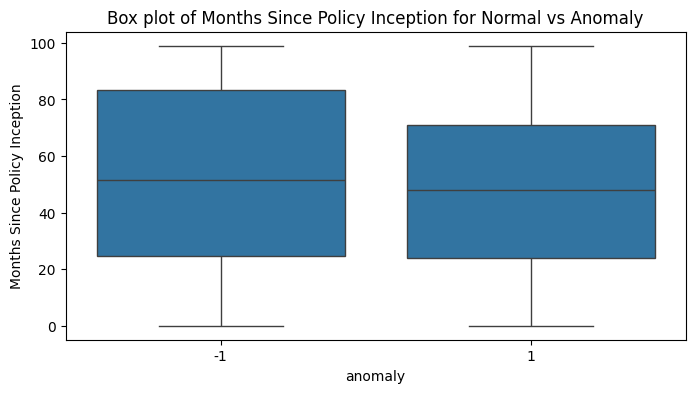

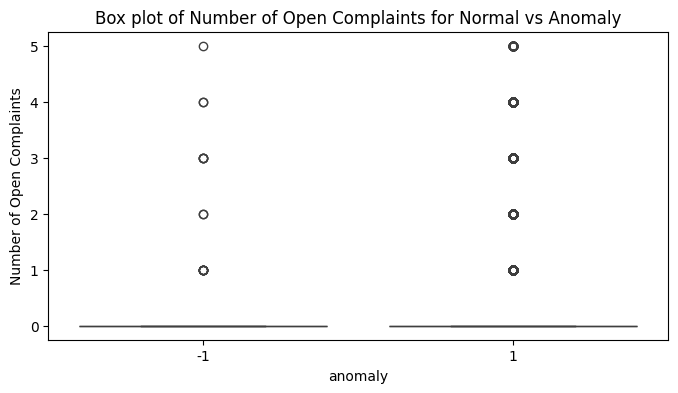

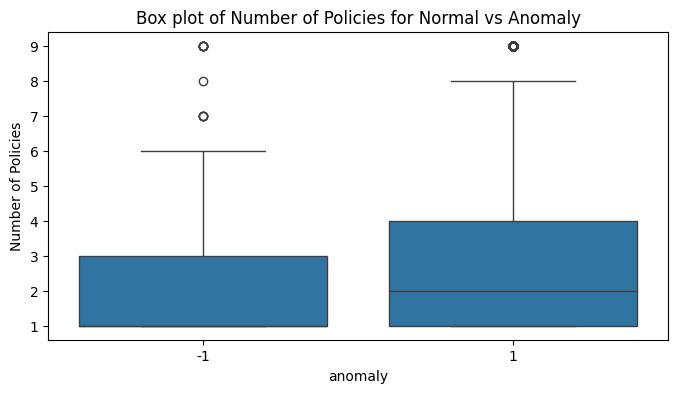

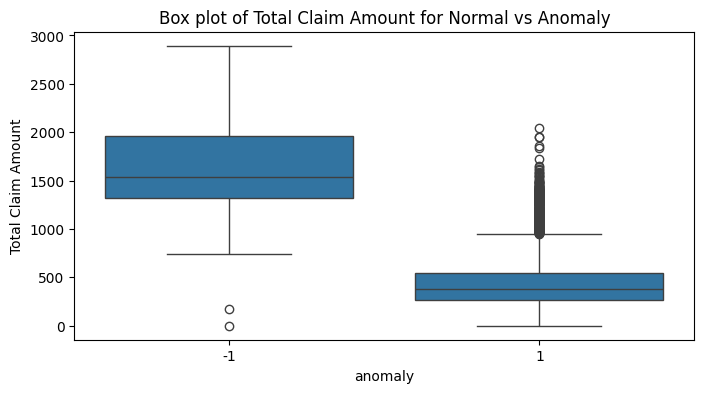

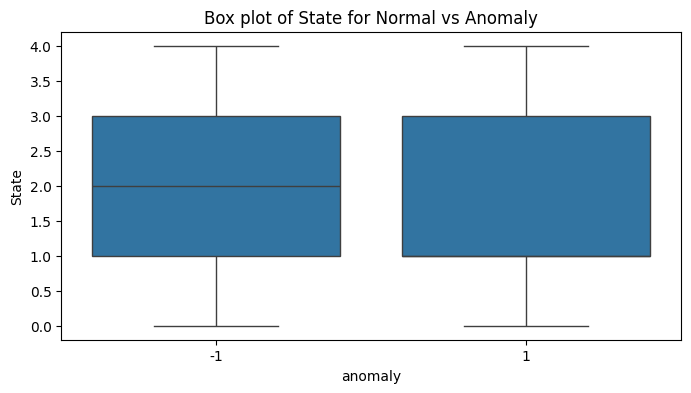

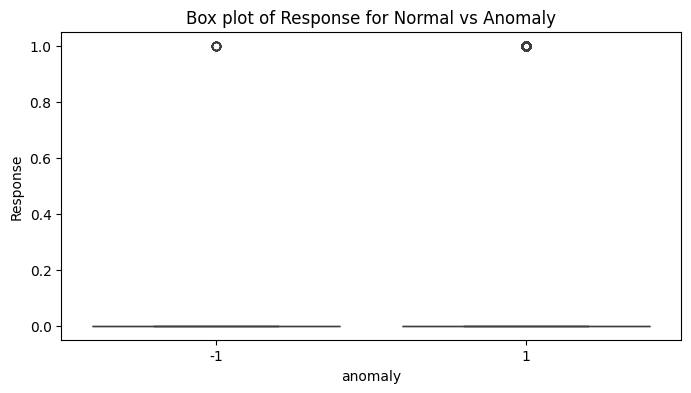

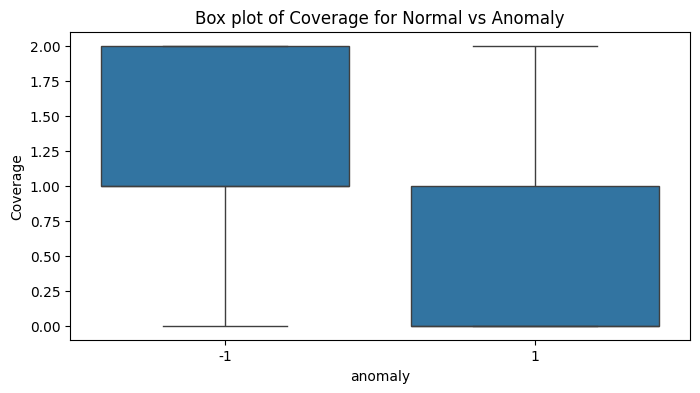

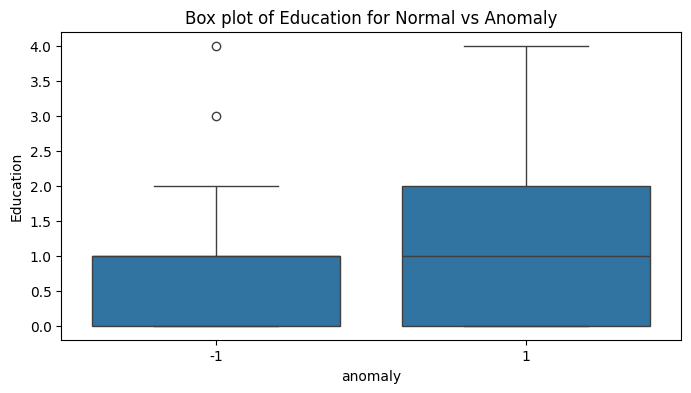

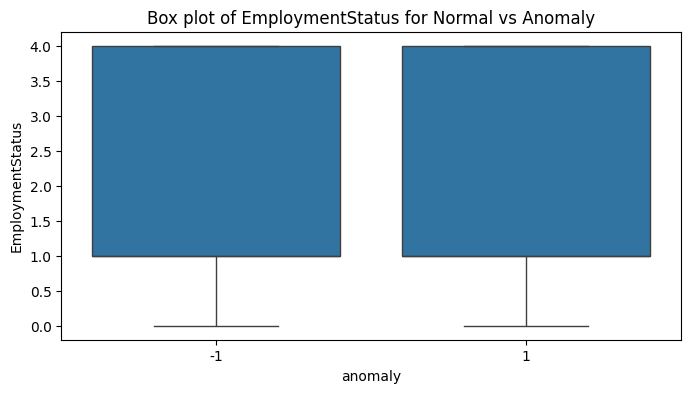

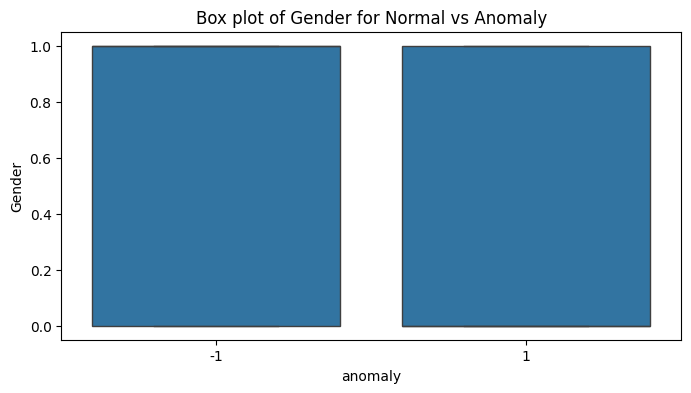

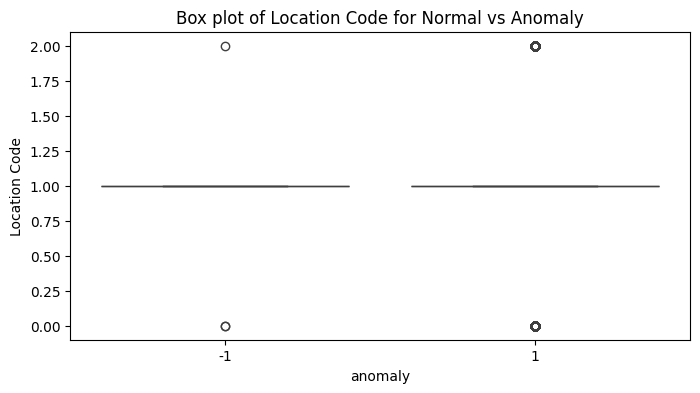

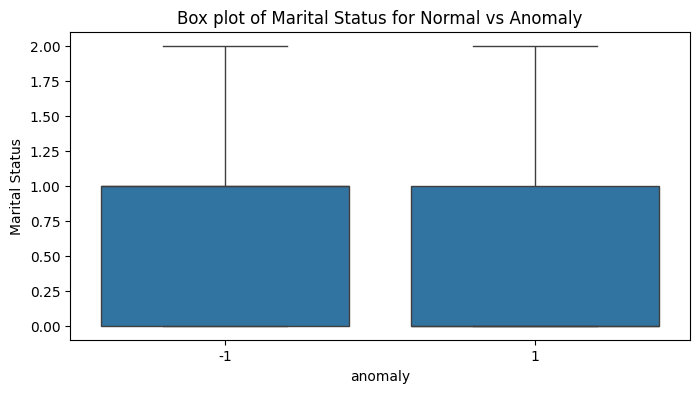

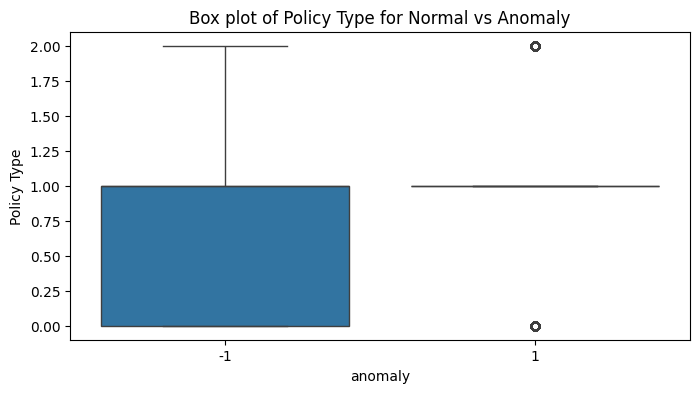

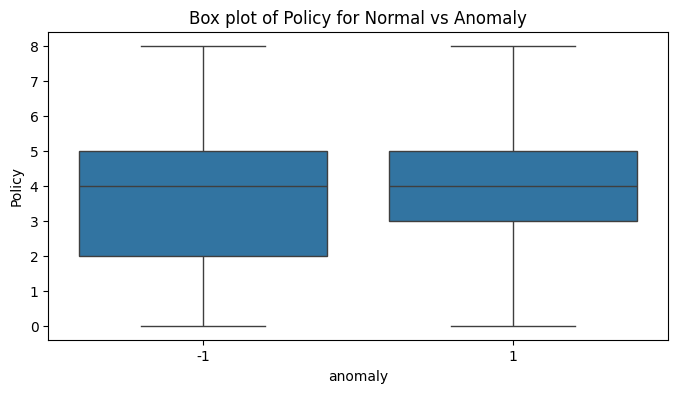

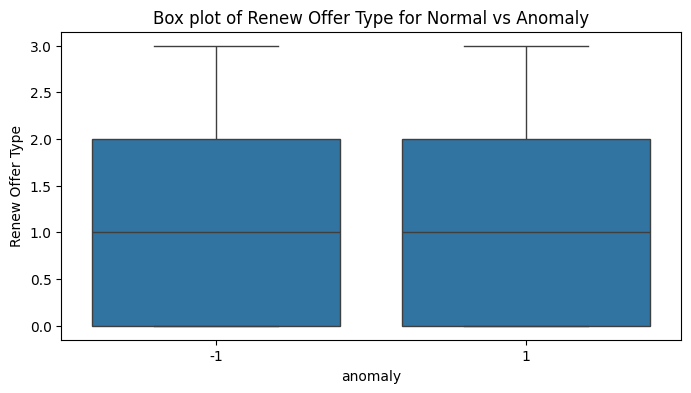

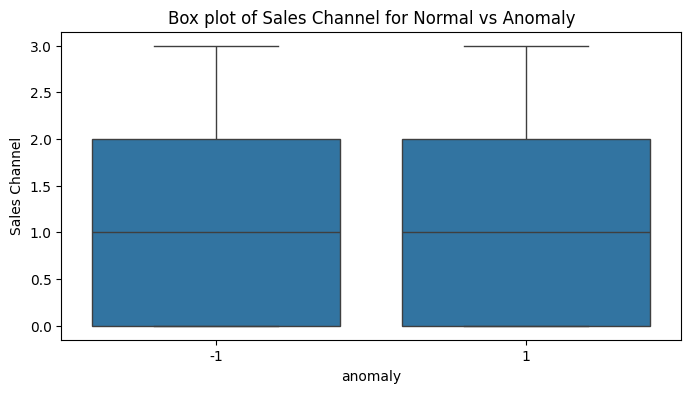

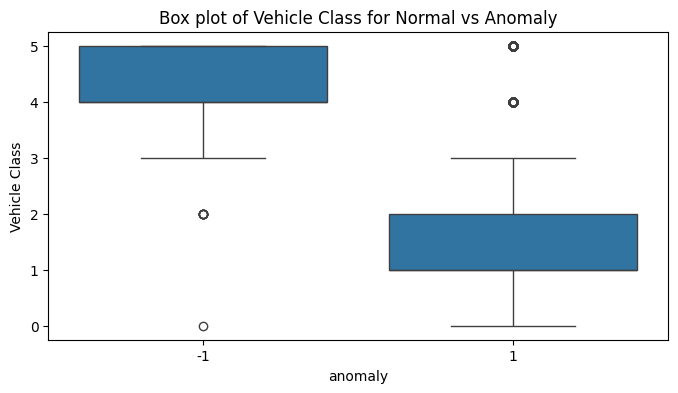

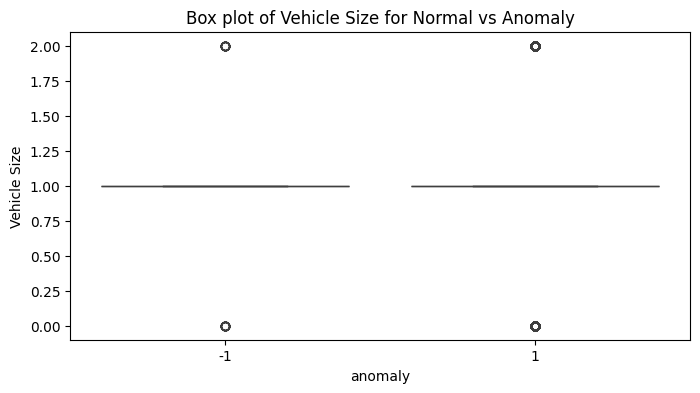

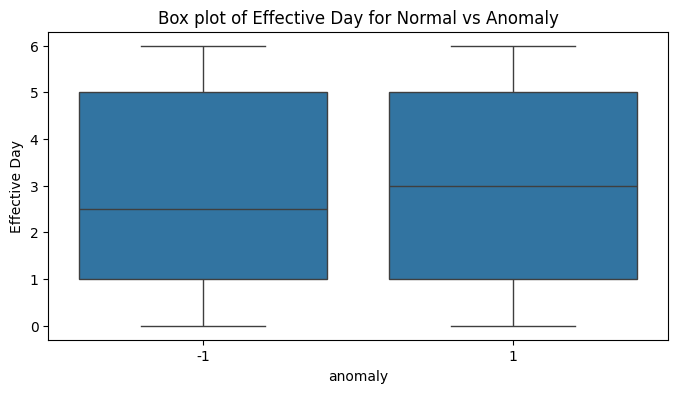

In [236]:
for column in auto_insurance_df_copy.columns[:-1]:  # Exclude the 'anomaly' column
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='anomaly', y=column, data=auto_insurance_df_copy)
    plt.title(f'Box plot of {column} for Normal vs Anomaly')
    plt.show()

In [237]:
# We can see the anamaly as -1.

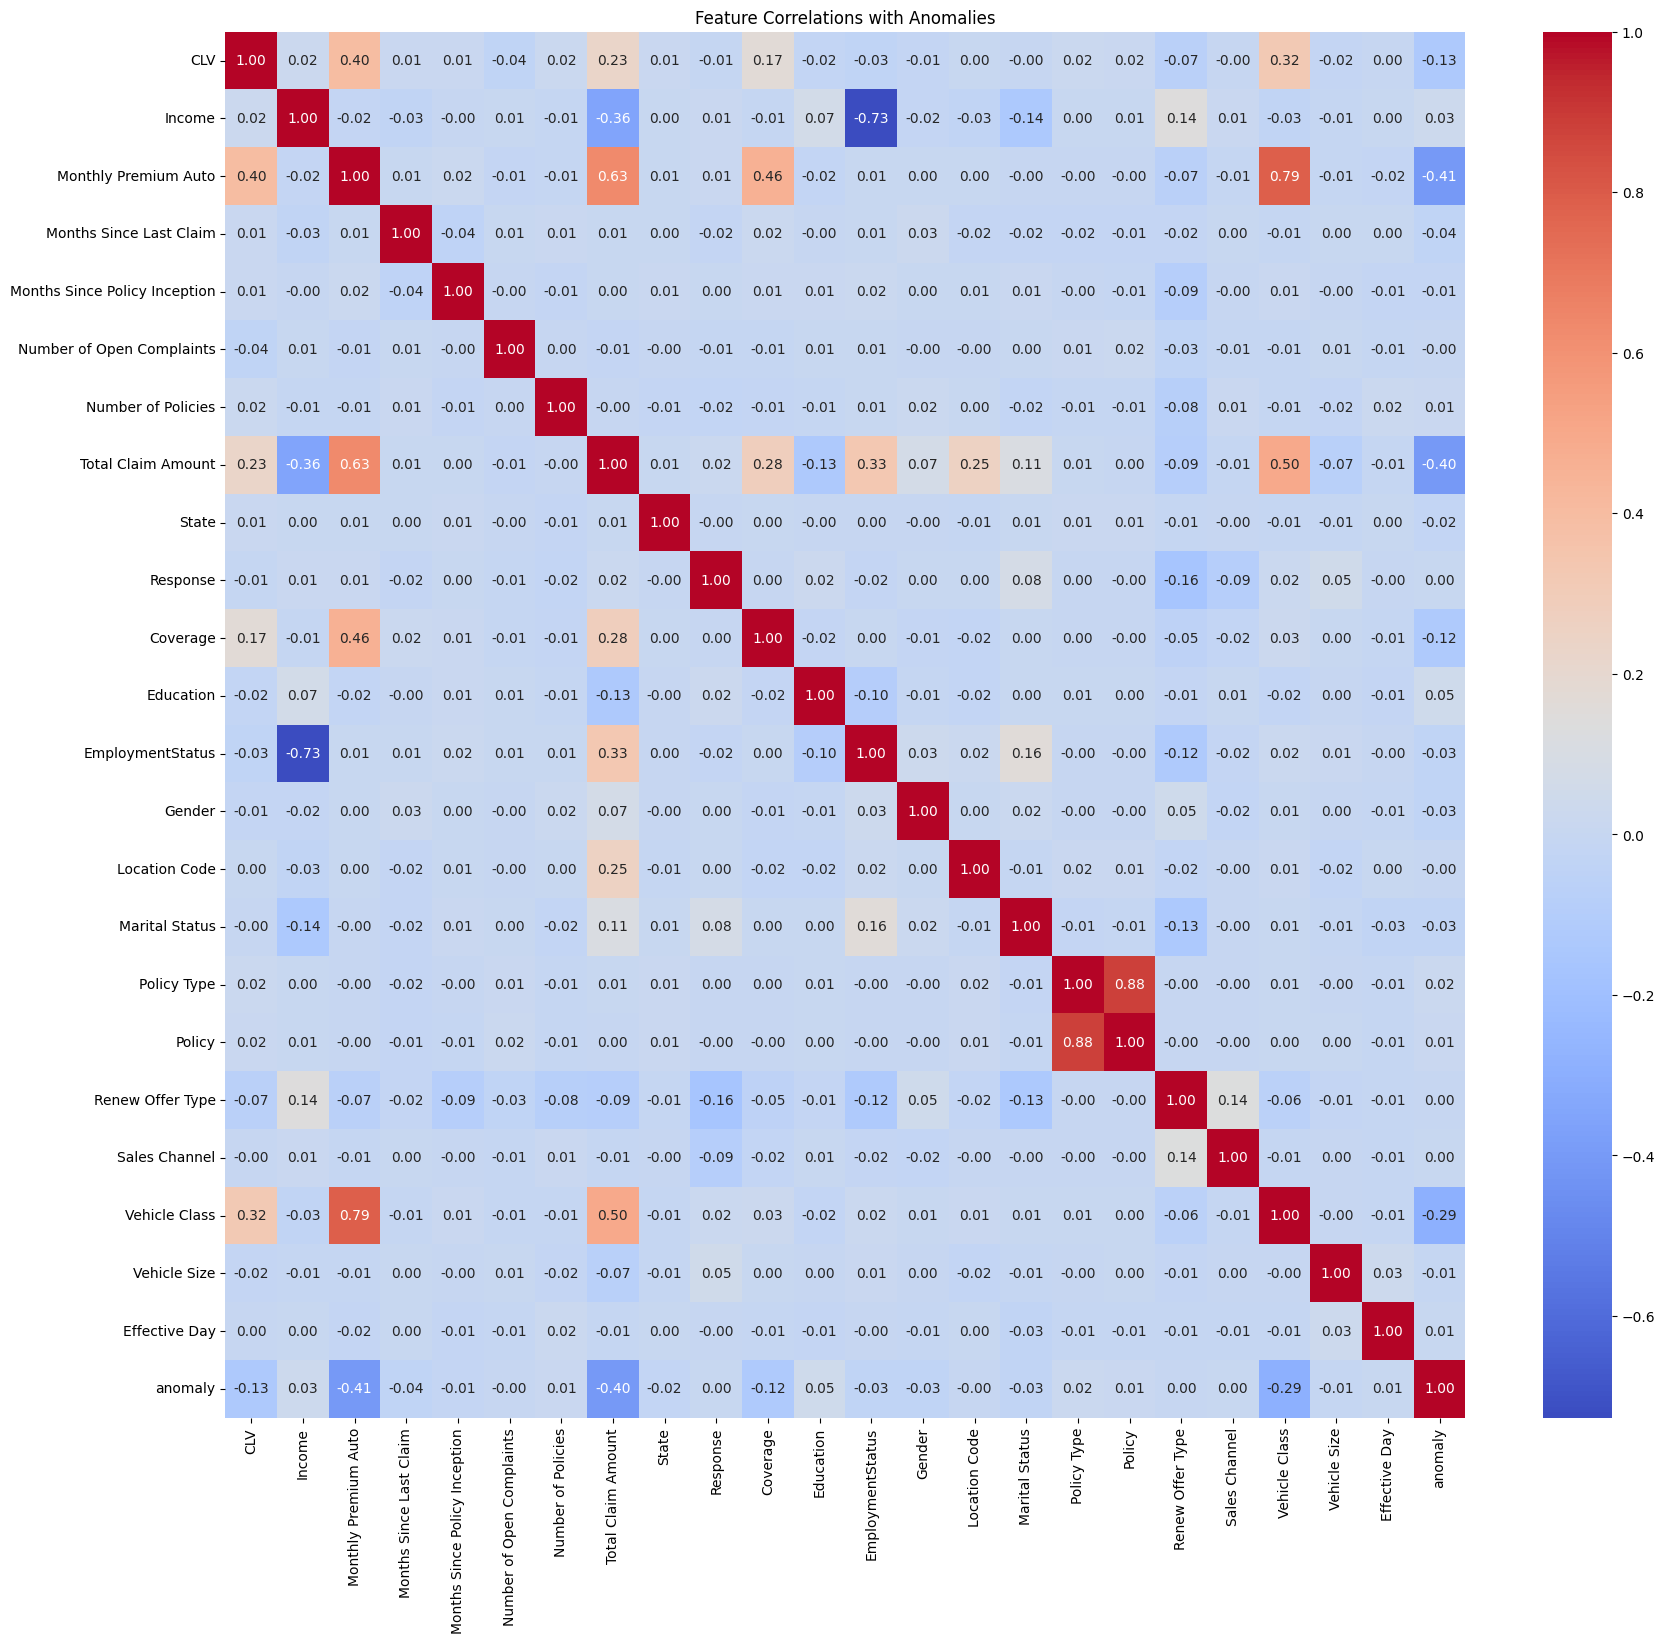

In [238]:
corr_matrix = auto_insurance_df_copy.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations with Anomalies')
plt.show()

In [239]:
# Monthly premuim Auto and Total claim amount and vehicle have modrate correlation.

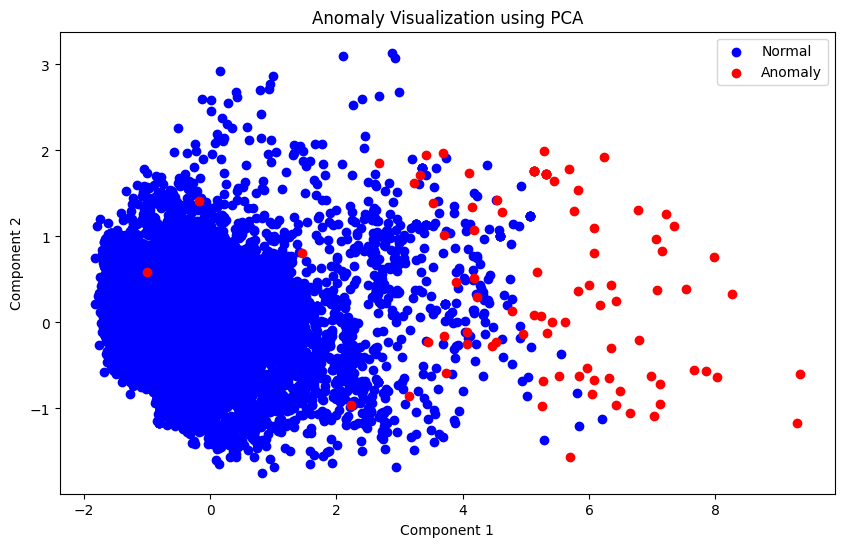

In [240]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest_tuned.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

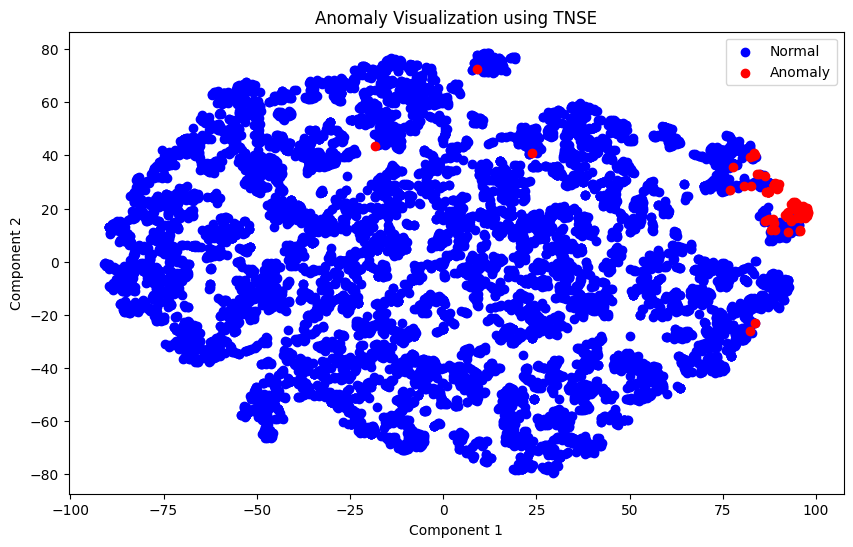

In [241]:
tnse = TSNE(n_components=2)
data_2d = tnse.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest_tuned.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using TNSE')
plt.legend()
plt.show()

In [242]:
# We can see the anamaly in red which on the outer side of the components

In [243]:
auto_insurance_df_copy[auto_insurance_df_copy['anomaly']==1].describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective Day,anomaly
count,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000
mean,7915.2280887,37752.5971024,91.8103296,15.0610484,48.0241097,0.3842070,2.9696970,422.2718067,1.7393276,0.1433311,0.4726830,1.2932979,1.8212785,0.4883875,0.9789869,0.5675735,0.8268082,3.7999336,0.9703605,1.1031851,1.2000664,0.9099757,3.0338421,1.0000000
std,6714.5607405,30373.9863497,31.2944346,10.0469438,27.8563055,0.9092955,2.3897362,262.4993158,1.2871445,0.3504296,0.6498239,1.0807551,1.3451559,0.4998928,0.6085342,0.7386806,0.4758034,1.6040776,1.0074414,1.0692600,0.9779722,0.5367503,2.0479174,0.0000000
min,1898.0076750,0.0000000,61.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0990070,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
25%,3965.1420963,0.0000000,68.0000000,6.0000000,24.0000000,0.0000000,1.0000000,269.1507567,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,3.0000000,0.0000000,0.0000000,1.0000000,1.0000000,1.0000000,1.0000000
50%,5744.6756460,34068.5000000,82.0000000,14.0000000,48.0000000,0.0000000,2.0000000,379.2000000,1.0000000,0.0000000,0.0000000,1.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,3.0000000,1.0000000
75%,8861.7959195,62447.7500000,108.0000000,23.0000000,71.0000000,0.0000000,4.0000000,542.4000000,3.0000000,0.0000000,1.0000000,2.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,5.0000000,2.0000000,2.0000000,2.0000000,1.0000000,5.0000000,1.0000000
max,83325.3811900,99981.0000000,296.0000000,35.0000000,99.0000000,5.0000000,9.0000000,2042.5690890,4.0000000,1.0000000,2.0000000,4.0000000,4.0000000,1.0000000,2.0000000,2.0000000,2.0000000,8.0000000,3.0000000,3.0000000,5.0000000,2.0000000,6.0000000,1.0000000


In [244]:
auto_insurance_df_copy[auto_insurance_df_copy['anomaly']==-1].describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective Day,anomaly
count,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000
mean,16822.1078348,28299.1956522,231.6956522,18.6304348,52.0434783,0.4021739,2.6195652,1595.4931631,1.9782609,0.1304348,1.2608696,0.8043478,2.2608696,0.6521739,0.9891304,0.7934783,0.7391304,3.5869565,0.9565217,1.0543478,4.1956522,0.9565217,2.9130435,-1.0000000
std,13395.5912800,29654.0945101,44.0144180,11.9345444,32.3480091,1.0169960,2.4217076,496.1468668,1.3340697,0.3386266,0.7684659,0.8800491,1.5325735,0.4788903,0.1812390,0.6552920,0.4887653,1.7799381,1.0261744,1.0930764,0.9404129,0.5913858,2.0789482,0.0000000
min,3423.8221890,0.0000000,86.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.5177530,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,-1.0000000
25%,9094.3757190,0.0000000,196.0000000,6.7500000,24.5000000,0.0000000,1.0000000,1324.8000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,2.0000000,0.0000000,0.0000000,4.0000000,1.0000000,1.0000000,-1.0000000
50%,11659.8134900,26844.5000000,231.5000000,21.5000000,51.5000000,0.0000000,1.0000000,1538.3875915,2.0000000,0.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,4.0000000,1.0000000,1.0000000,4.0000000,1.0000000,2.5000000,-1.0000000
75%,18687.6350150,51643.0000000,276.0000000,30.0000000,83.2500000,0.0000000,3.0000000,1962.2715367,3.0000000,0.0000000,2.0000000,1.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,5.0000000,2.0000000,2.0000000,5.0000000,1.0000000,5.0000000,-1.0000000
max,74228.5160400,99816.0000000,298.0000000,35.0000000,99.0000000,5.0000000,9.0000000,2893.2396780,4.0000000,1.0000000,2.0000000,4.0000000,4.0000000,1.0000000,2.0000000,2.0000000,2.0000000,8.0000000,3.0000000,3.0000000,5.0000000,2.0000000,6.0000000,-1.0000000


In [245]:
isolation_forest_tuned =  IsolationForest(bootstrap=False, contamination=0.01, max_features=0.4, max_samples=0.2,
                                         n_estimators=75 ,random_state=100 , warm_start=True)
isolation_forest_tuned.fit(data_scaled)
anomalies = isolation_forest_tuned.predict(data_scaled)

silhouette_score(data_scaled,anomalies)

0.6365173572915019

In [246]:
isolation_forest_tuned2 =  IsolationForest(bootstrap=True, contamination=0.02, max_features=3, max_samples=0.4,
                                         n_estimators=30 ,random_state=100 , warm_start=False)
isolation_forest_tuned2.fit(data_scaled)
anomalies = isolation_forest_tuned2.predict(data_scaled)

silhouette_score(data_scaled,anomalies)

0.5857601531237004

In [247]:
isolation_forest_tuned2 =  IsolationForest(bootstrap=True, contamination=0.02, max_features=3, max_samples=0.4,
                                         n_estimators=30 ,random_state=100 , warm_start=False)
isolation_forest_tuned2.fit(data_scaled)
anomalies = isolation_forest_tuned2.predict(data_scaled)

silhouette_score(data_scaled,anomalies)

0.5857601531237004

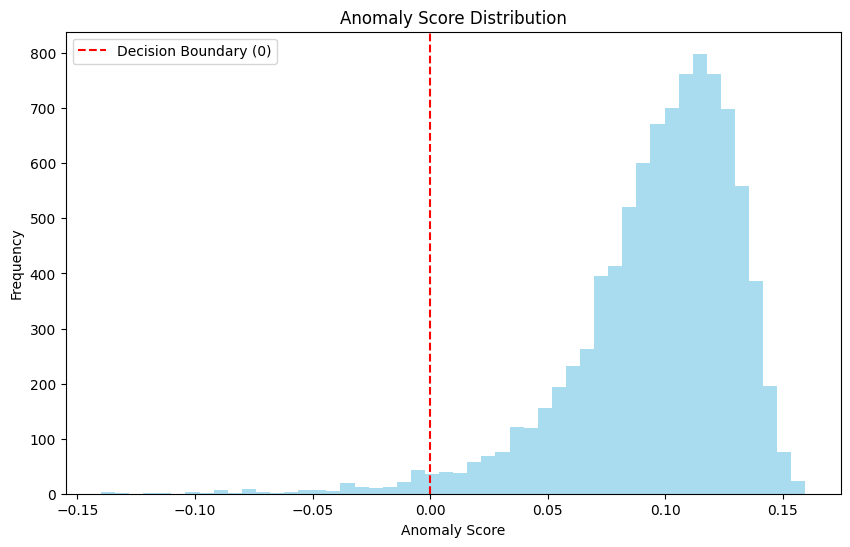

In [248]:
scores = isolation_forest_tuned2.decision_function(data_scaled)
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, color='skyblue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.legend()
plt.show()

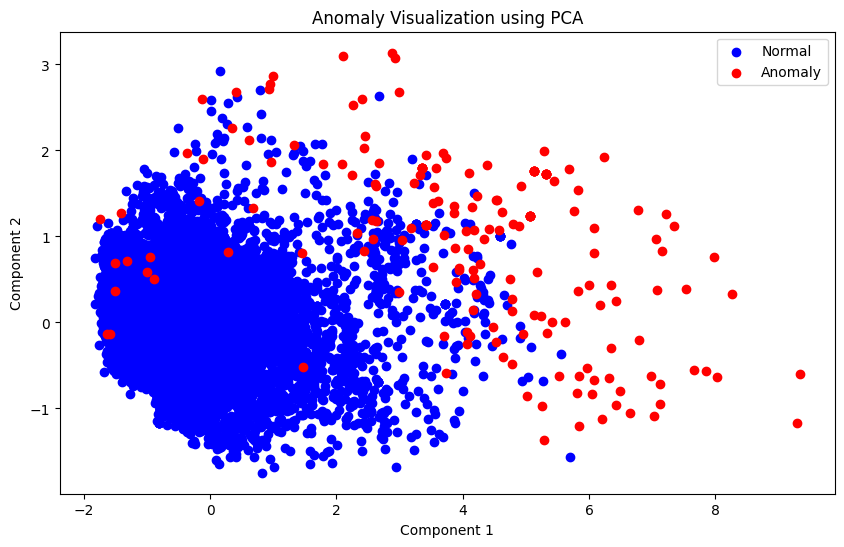

In [249]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = isolation_forest_tuned2.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

## Outlier detection using LocalOutlierFactor

In [165]:
scaler2 = RobustScaler()
#data_scaled = scaler.fit_transform(data_selected)
data_scaled = scaler2.fit_transform(X_num)

In [166]:
lof = LocalOutlierFactor(novelty=True)
lof.fit(data_scaled)

outlier_predictions = lof.predict(data_scaled)

silhouette_score(data_scaled, outlier_predictions)

0.17267341675415893

In [167]:
# We are getting 0.55 silhouette score

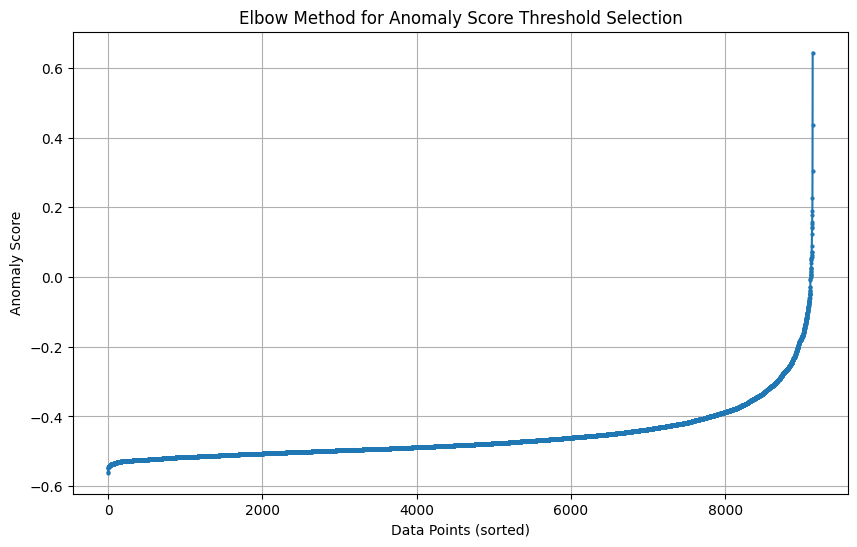

In [168]:
anomaly_scores = -lof.decision_function(data_scaled)  # Invert to make anomalies have higher scores

sorted_scores = np.sort(anomaly_scores)

plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_scores)), sorted_scores, marker='o', markersize=2, linestyle='-')
plt.xlabel("Data Points (sorted)")
plt.ylabel("Anomaly Score")
plt.title("Elbow Method for Anomaly Score Threshold Selection")
plt.grid()
plt.show()

In [169]:
# The model labels outliers as -1 and normal points as 1
outliers = outlier_predictions == -1

# Display the rows that are outliers
outlier_rows = X_num[outliers]


# Display the rows that are outliers
outlier_rows = X_num[outliers]
print("Total number of outlier records ", outlier_rows.shape[0])
print("Total percentage of outlier records ", outlier_rows.shape[0]/X_num.shape[0])

Total number of outlier records  28
Total percentage of outlier records  0.003065469673746442


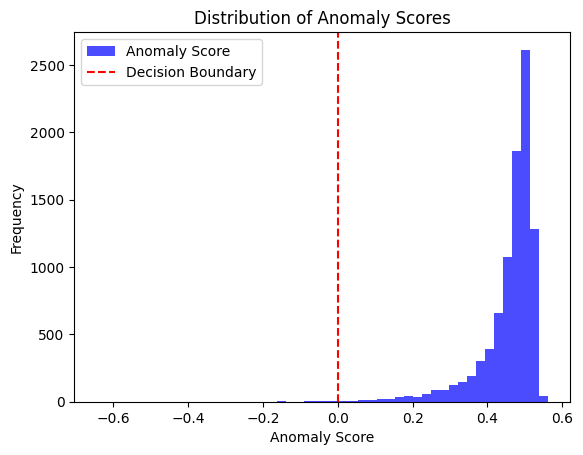

In [170]:
scores = lof.decision_function(data_scaled)
threshold = 0 
plt.hist(scores, bins=50, alpha=0.7, color='blue', label='Anomaly Score')
plt.axvline(x=threshold, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Anomaly Scores")
plt.show()

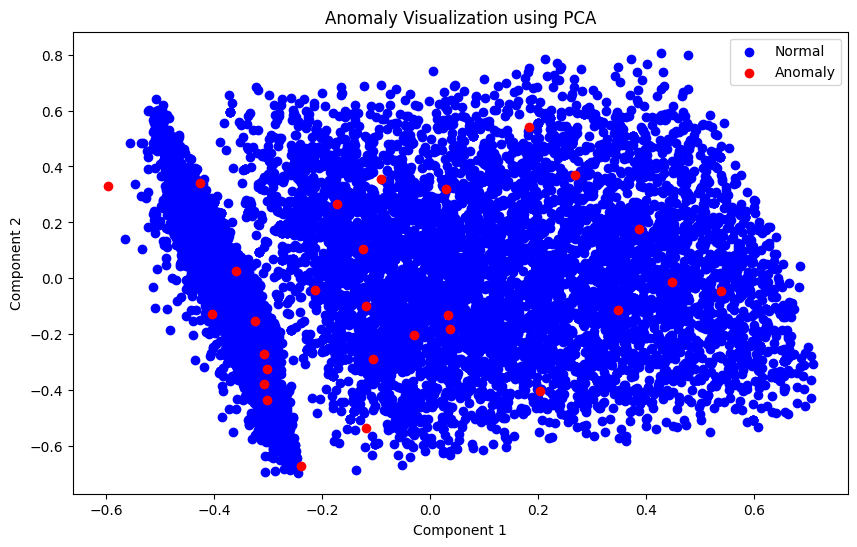

In [171]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = lof.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

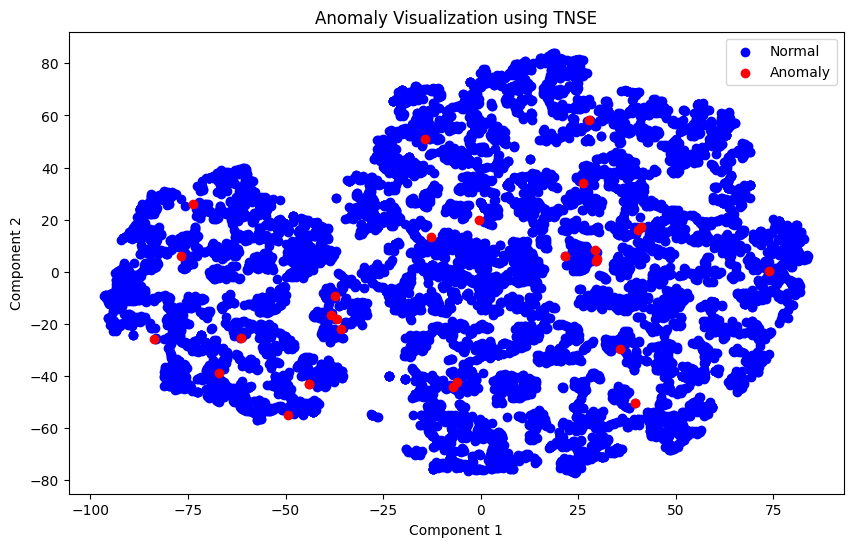

In [172]:
tnse = TSNE(n_components=2)
data_2d = tnse.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = lof.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using TNSE')
plt.legend()
plt.show()

In [173]:
param_grid = {
    'n_neighbors': [5, 10, 20, 30, 50],
    'contamination': [0.01, 0.05, 0.1, 0.15, 0.2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}


lof = LocalOutlierFactor(novelty=True)
grid_search = GridSearchCV(
    estimator=lof,
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer), cv=5,verbose=2
)

grid_search.fit(data_scaled)


print(f"Best parameters : {grid_search.best_params_}")
print(f"Best score : {grid_search.best_score_}")
print(f"Best estimator : {grid_search.best_estimator_}")

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END contamination=0.01, metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.01, metric=minkowski, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.01, metric=minko

[CV] END contamination=0.05, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.05, metric=euclidean, n_neighbors=20; total time=   0.0s
[CV] END contaminati

[CV] END .contamination=0.1, metric=manhattan, n_neighbors=5; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.1, metric=manhattan, n_neighbors=30; total time=   0.0s
[CV] END contamination=0.1, 

[CV] END contamination=0.2, metric=minkowski, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=10; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=20; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=30; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=30; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=30; total time=   0.0s
[CV] END contamination=0.2, metric=minkowski, n_neighbors=30; total time=   0.0s
[CV] END contamination=0.2, 

In [174]:
lof_tuned = LocalOutlierFactor(n_neighbors=5, contamination=0.01,metric='euclidean', novelty=True)
lof_tuned.fit(data_scaled)
outlier_predictions = lof_tuned.predict(data_scaled)

silhouette_score(data_scaled, outlier_predictions)

0.20203426734276267

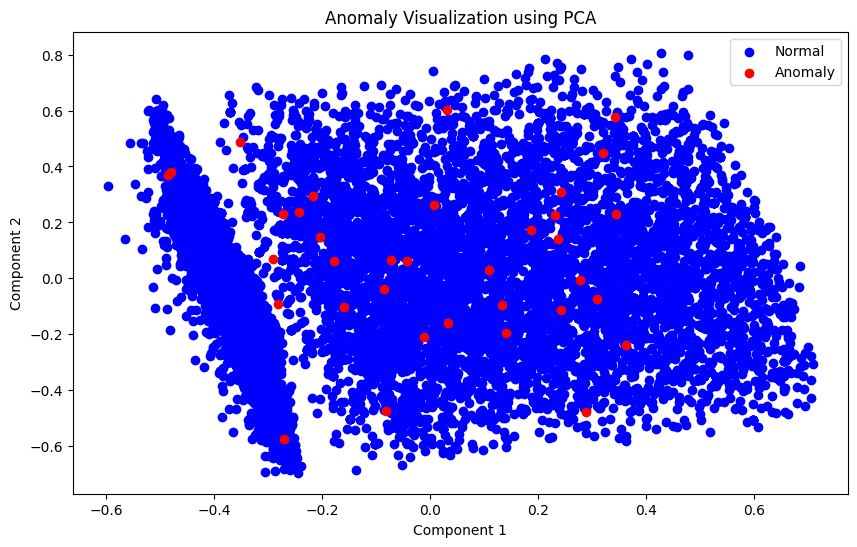

In [175]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)  # Replace with t-SNE if needed

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = lof_tuned.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

In [176]:
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5],
    'contamination': [0.005, 0.0075, 0.01],
    'leaf_size': [10, 20, 30],
    'p' : [1, 2, 3, 4, 5]
}


lof = LocalOutlierFactor(novelty=True)
grid_search = GridSearchCV(
    estimator=lof,
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer), cv=5,verbose=2
)

grid_search.fit(data_scaled)


print(f"Best parameters : {grid_search.best_params_}")
print(f"Best score : {grid_search.best_score_}")
print(f"Best estimator : {grid_search.best_estimator_}")

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=1, p=3; total time=   0.0s
[CV] END contamination=

[CV] END contamination=0.005, leaf_size=10, n_neighbors=4, p=5; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=10, n_neighbors=5, p=3; total time=   0.1s
[CV]

[CV] END contamination=0.005, leaf_size=20, n_neighbors=3, p=5; total time=   0.1s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=3, p=5; total time=   0.1s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=20, n_neighbors=4, p=2; total time=   0.0s
[CV]

[CV] END contamination=0.005, leaf_size=30, n_neighbors=2, p=5; total time=   0.1s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=2, p=5; total time=   0.1s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=1; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=2; total time=   0.0s
[CV] END contamination=0.005, leaf_size=30, n_neighbors=3, p=2; total time=   0.0s
[CV]

[CV] END contamination=0.0075, leaf_size=10, n_neighbors=1, p=5; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=1, p=5; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=1, p=5; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=2; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=2; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=2; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=2, p=2; total time=

[CV] END contamination=0.0075, leaf_size=10, n_neighbors=5, p=5; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=5, p=5; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=5, p=5; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=5, p=5; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=10, n_neighbors=5, p=5; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=1, p=2; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=1, p=2; total time=

[CV] END contamination=0.0075, leaf_size=20, n_neighbors=4, p=4; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=4, p=4; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=20, n_neighbors=5, p=1; total time=

[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=4; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=4; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=4; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=4; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=3, p=5; total time=   0.1s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=4, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=4, p=1; total time=   0.0s
[CV] END contamination=0.0075, leaf_size=30, n_neighbors=4, p=1; total time=

[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=2, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=3, p=1; total time=   0.0s
[CV] END contamination=0.01, leaf_size=10, n_neighbors=3, p=1; total time=   0.0s
[CV] END contami

[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=4; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=1, p=5; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=2, p=1; total time=   0.0s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=2, p=1; total time=   0.0s
[CV] END contami

[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=4; total time=   0.1s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=4; total time=   0.1s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=4; total time=   0.1s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=4; total time=   0.1s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=20, n_neighbors=5, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=1, p=1; total time=   0.0s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=1, p=1; total time=   0.0s
[CV] END contami

[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=4; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=4; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=4; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=4; total time=   0.2s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=4, p=5; total time=   0.1s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=5, p=1; total time=   0.0s
[CV] END contamination=0.01, leaf_size=30, n_neighbors=5, p=1; total time=   0.0s
[CV] END contami

In [177]:
lof_tuned = LocalOutlierFactor(n_neighbors=5, p=2,contamination=0.002,metric='euclidean', novelty=True)
lof_tuned.fit(data_scaled)
outlier_predictions = lof_tuned.predict(data_scaled)

silhouette_score(data_scaled, outlier_predictions)

0.3657861731976141

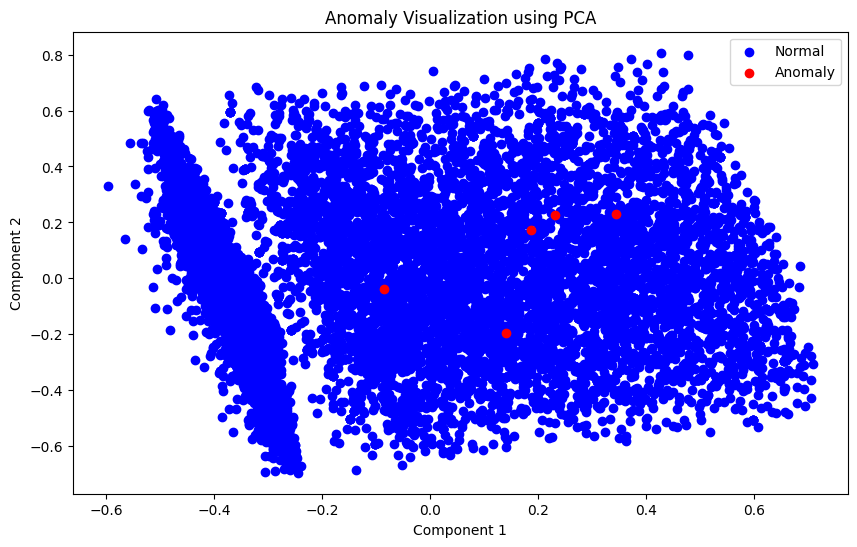

In [178]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled) 

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = lof_tuned.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()

In [179]:
auto_insurance_df_copy[auto_insurance_df_copy['anomaly']==1].describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective Day,anomaly
count,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000,9042.0000000
mean,7915.2280887,37752.5971024,91.8103296,15.0610484,48.0241097,0.3842070,2.9696970,422.2718067,1.7393276,0.1433311,0.4726830,1.2932979,1.8212785,0.4883875,0.9789869,0.5675735,0.8268082,3.7999336,0.9703605,1.1031851,1.2000664,0.9099757,3.0338421,1.0000000
std,6714.5607405,30373.9863497,31.2944346,10.0469438,27.8563055,0.9092955,2.3897362,262.4993158,1.2871445,0.3504296,0.6498239,1.0807551,1.3451559,0.4998928,0.6085342,0.7386806,0.4758034,1.6040776,1.0074414,1.0692600,0.9779722,0.5367503,2.0479174,0.0000000
min,1898.0076750,0.0000000,61.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0990070,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
25%,3965.1420963,0.0000000,68.0000000,6.0000000,24.0000000,0.0000000,1.0000000,269.1507567,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,3.0000000,0.0000000,0.0000000,1.0000000,1.0000000,1.0000000,1.0000000
50%,5744.6756460,34068.5000000,82.0000000,14.0000000,48.0000000,0.0000000,2.0000000,379.2000000,1.0000000,0.0000000,0.0000000,1.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,3.0000000,1.0000000
75%,8861.7959195,62447.7500000,108.0000000,23.0000000,71.0000000,0.0000000,4.0000000,542.4000000,3.0000000,0.0000000,1.0000000,2.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,5.0000000,2.0000000,2.0000000,2.0000000,1.0000000,5.0000000,1.0000000
max,83325.3811900,99981.0000000,296.0000000,35.0000000,99.0000000,5.0000000,9.0000000,2042.5690890,4.0000000,1.0000000,2.0000000,4.0000000,4.0000000,1.0000000,2.0000000,2.0000000,2.0000000,8.0000000,3.0000000,3.0000000,5.0000000,2.0000000,6.0000000,1.0000000


In [180]:
auto_insurance_df_copy[auto_insurance_df_copy['anomaly']==-1].describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Effective Day,anomaly
count,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000,92.0000000
mean,16822.1078348,28299.1956522,231.6956522,18.6304348,52.0434783,0.4021739,2.6195652,1595.4931631,1.9782609,0.1304348,1.2608696,0.8043478,2.2608696,0.6521739,0.9891304,0.7934783,0.7391304,3.5869565,0.9565217,1.0543478,4.1956522,0.9565217,2.9130435,-1.0000000
std,13395.5912800,29654.0945101,44.0144180,11.9345444,32.3480091,1.0169960,2.4217076,496.1468668,1.3340697,0.3386266,0.7684659,0.8800491,1.5325735,0.4788903,0.1812390,0.6552920,0.4887653,1.7799381,1.0261744,1.0930764,0.9404129,0.5913858,2.0789482,0.0000000
min,3423.8221890,0.0000000,86.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.5177530,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,-1.0000000
25%,9094.3757190,0.0000000,196.0000000,6.7500000,24.5000000,0.0000000,1.0000000,1324.8000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,2.0000000,0.0000000,0.0000000,4.0000000,1.0000000,1.0000000,-1.0000000
50%,11659.8134900,26844.5000000,231.5000000,21.5000000,51.5000000,0.0000000,1.0000000,1538.3875915,2.0000000,0.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,4.0000000,1.0000000,1.0000000,4.0000000,1.0000000,2.5000000,-1.0000000
75%,18687.6350150,51643.0000000,276.0000000,30.0000000,83.2500000,0.0000000,3.0000000,1962.2715367,3.0000000,0.0000000,2.0000000,1.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,5.0000000,2.0000000,2.0000000,5.0000000,1.0000000,5.0000000,-1.0000000
max,74228.5160400,99816.0000000,298.0000000,35.0000000,99.0000000,5.0000000,9.0000000,2893.2396780,4.0000000,1.0000000,2.0000000,4.0000000,4.0000000,1.0000000,2.0000000,2.0000000,2.0000000,8.0000000,3.0000000,3.0000000,5.0000000,2.0000000,6.0000000,-1.0000000


In [181]:
lof_tuned2 = LocalOutlierFactor(n_neighbors=5, contamination=0.01,metric='euclidean', novelty=True)
lof_tuned2.fit(data_scaled)
outlier_predictions = lof_tuned2.predict(data_scaled)

silhouette_score(data_scaled, outlier_predictions)

0.20203426734276267

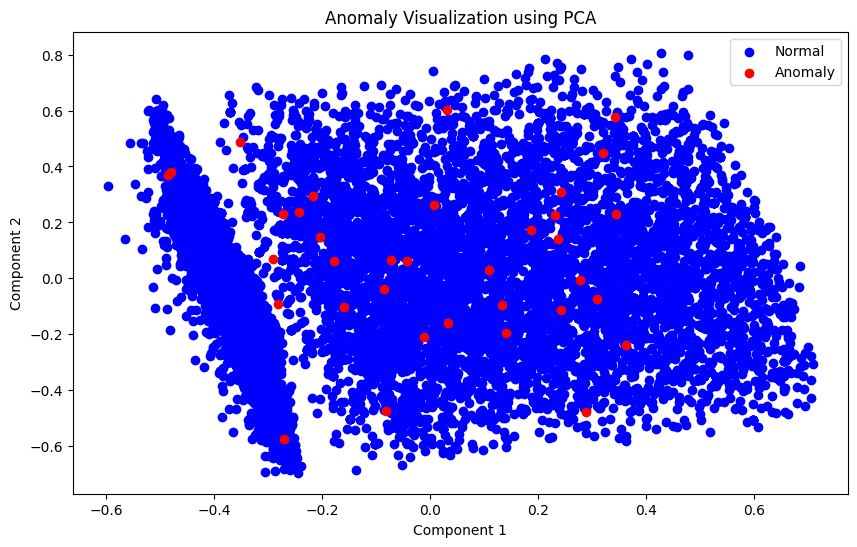

In [182]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled) 

# Anomaly labels from Isolation Forest predictions (-1 for anomaly, 1 for normal)
predictions = lof_tuned2.predict(data_scaled)  
anomalies = predictions == -1

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[~anomalies, 0], data_2d[~anomalies, 1], color='blue', label='Normal')
plt.scatter(data_2d[anomalies, 0], data_2d[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Anomaly Visualization using PCA')
plt.legend()
plt.show()